In [638]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np

## 0 - Set Up Virtual Data Base

In [639]:
freq_df = pd.read_csv("freMTPL2freq.csv")
sev_df = pd.read_csv("freMTPL2sev.csv")

# Create Database Connection
conn = sqlite3.connect("virtual_database.db")

# Write CSV Files to Virtual Database
freq_df.to_sql("freq_tab", conn, if_exists="replace", index=False)
sev_df.to_sql("sev_tab", conn, if_exists="replace", index=False)

# Close Connection
conn.close()

## 1. - Daten Exploration

In [640]:
conn = sqlite3.connect("virtual_database.db")

# Lade die Daten in Pandas DataFrames
freq_df = pd.read_sql_query("SELECT * FROM freq_tab;", conn)
sev_df = pd.read_sql_query("SELECT * FROM sev_tab;", conn)

conn.close()

In [641]:
freq_df.isna().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [642]:
sev_df.isna().sum()

IDpol          0
ClaimAmount    0
dtype: int64

In [643]:
freq_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


In [644]:
sev_df.describe()

,IDpol,ClaimAmount
count,2.663900e+04,2.663900e+04
mean,2.279864e+06,2.278536e+03
std,1.577202e+06,2.929748e+04
min,1.390000e+02,1.000000e+00
25%,1.087642e+06,6.868100e+02
50%,2.137413e+06,1.172000e+03
75%,3.180162e+06,1.228080e+03
max,6.113971e+06,4.075401e+06


In [645]:
print(freq_df.info())
print(freq_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB
None
IDpol         678013
ClaimNb           11
Exposure         181
Area               6
VehPower          12
VehAge            78
DrivAge           83
BonusMalus       115
VehBrand          11
VehGas             2
Density         1607
Re

In [646]:
print(sev_df.info())
print(sev_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  int64  
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 416.4 KB
None
IDpol          24950
ClaimAmount    12369
dtype: int64


In [647]:
print(len(sev_df))
print(len(freq_df))

26639
678013


In [648]:
print(sev_df.nunique())
print(freq_df.nunique())

IDpol          24950
ClaimAmount    12369
dtype: int64
IDpol         678013
ClaimNb           11
Exposure         181
Area               6
VehPower          12
VehAge            78
DrivAge           83
BonusMalus       115
VehBrand          11
VehGas             2
Density         1607
Region            22
dtype: int64


In [649]:
# Print Frequencies of Categorical Variables
for column in ['Area', 'VehBrand', 'VehGas', 'Region']:
    print(freq_df[column].value_counts())
    print("\n")

Area
'C'    191880
'D'    151596
'E'    137167
'A'    103957
'B'     75459
'F'     17954
Name: count, dtype: int64


VehBrand
'B12'    166024
'B1'     162736
'B2'     159861
'B3'      53395
'B5'      34753
'B6'      28548
'B4'      25179
'B10'     17707
'B11'     13585
'B13'     12178
'B14'      4047
Name: count, dtype: int64


VehGas
'Regular'    345877
'Diesel'     332136
Name: count, dtype: int64


Region
'R24'    160601
'R82'     84752
'R93'     79315
'R11'     69791
'R53'     42122
'R52'     38751
'R91'     35805
'R72'     31329
'R31'     27285
'R54'     19046
'R73'     17141
'R41'     12990
'R25'     10893
'R26'     10492
'R23'      8784
'R22'      7994
'R83'      5287
'R74'      4567
'R94'      4516
'R21'      3026
'R42'      2200
'R43'      1326
Name: count, dtype: int64




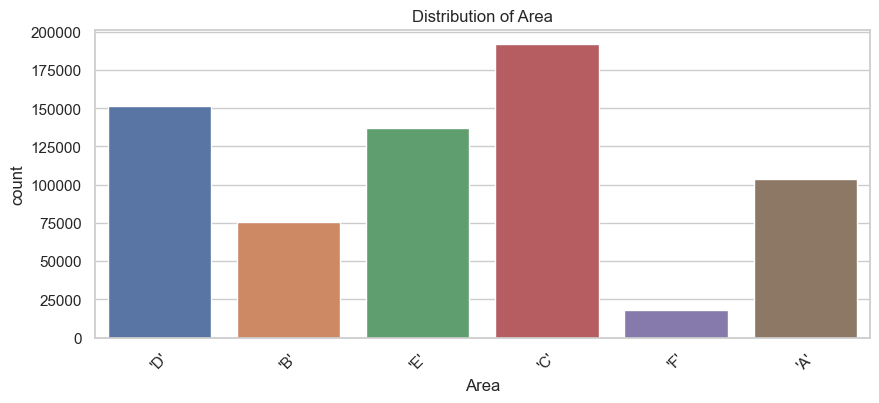

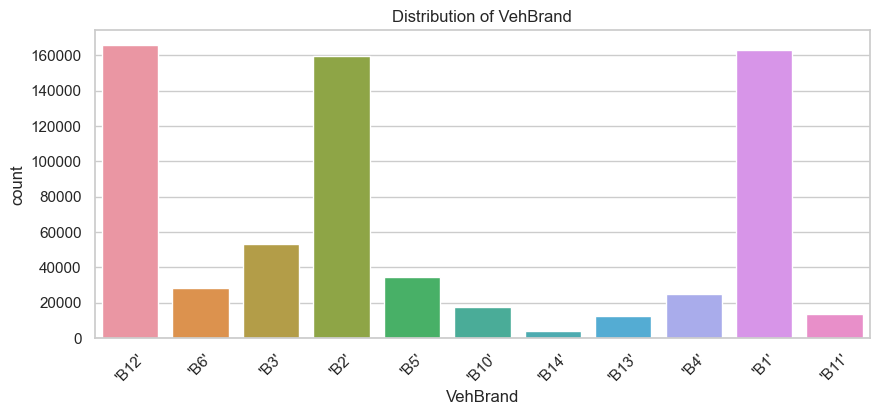

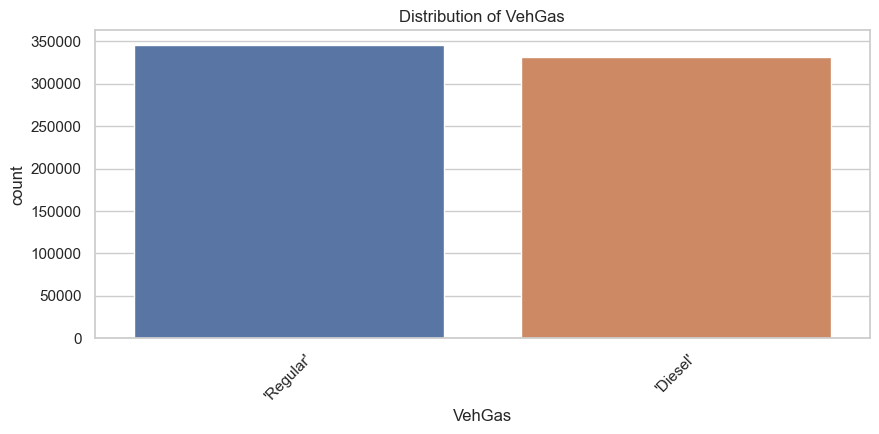

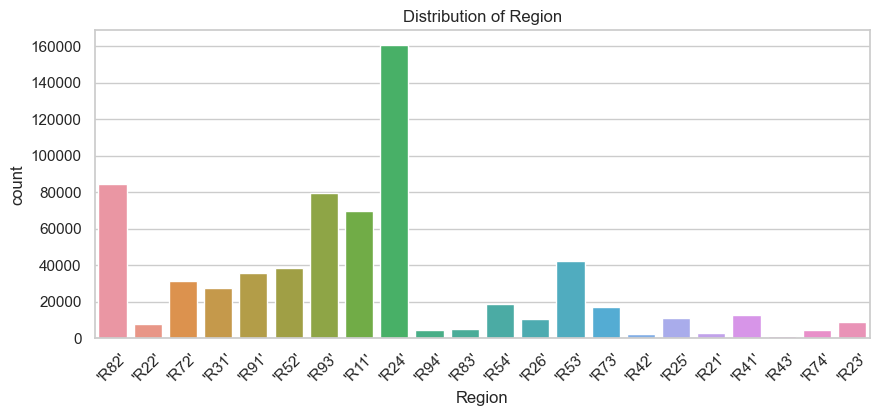

In [650]:
# Plot Frequencies of Categorical Variables
for column in ['Area', 'VehBrand', 'VehGas', 'Region']:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=freq_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [651]:
# Create two dataframes based on VehGas values
diesel_df = freq_df[freq_df['VehGas'] == "'Diesel'"]
regular_df = freq_df[freq_df['VehGas'] == "'Regular'"]

# Check to make sure all rows are accounted for
total_rows_original = freq_df.shape[0]
total_rows_new = diesel_df.shape[0] + regular_df.shape[0]

# Print results to verify correct split
print("Total rows in original dataframe:", total_rows_original)
print("Total rows in new dataframes combined:", total_rows_new)

# Verify if all rows are accounted for
if total_rows_original == total_rows_new:
    print("All rows are correctly accounted for in the new dataframes.")
else:
    print("Mismatch in row counts, check the data splits.")

print(diesel_df.describe())
print(regular_df.describe())

Total rows in original dataframe: 678013
Total rows in new dataframes combined: 678013
All rows are correctly accounted for in the new dataframes.
              IDpol        ClaimNb       Exposure       VehPower   
count  3.321360e+05  332136.000000  332136.000000  332136.000000  \
mean   2.696543e+06       0.050124       0.513828       6.578453   
std    1.630822e+06       0.232018       0.362710       1.839188   
min    5.000000e+00       0.000000       0.002732       4.000000   
25%    1.184114e+06       0.000000       0.160000       5.000000   
50%    2.284546e+06       0.000000       0.480000       6.000000   
75%    4.072151e+06       0.000000       0.950000       7.000000   
max    6.114330e+06      11.000000       1.880000      15.000000   

             VehAge        DrivAge     BonusMalus        Density  
count  332136.00000  332136.000000  332136.000000  332136.000000  
mean        6.30894      44.464855      59.260104    1392.374979  
std         5.18299      13.013799     

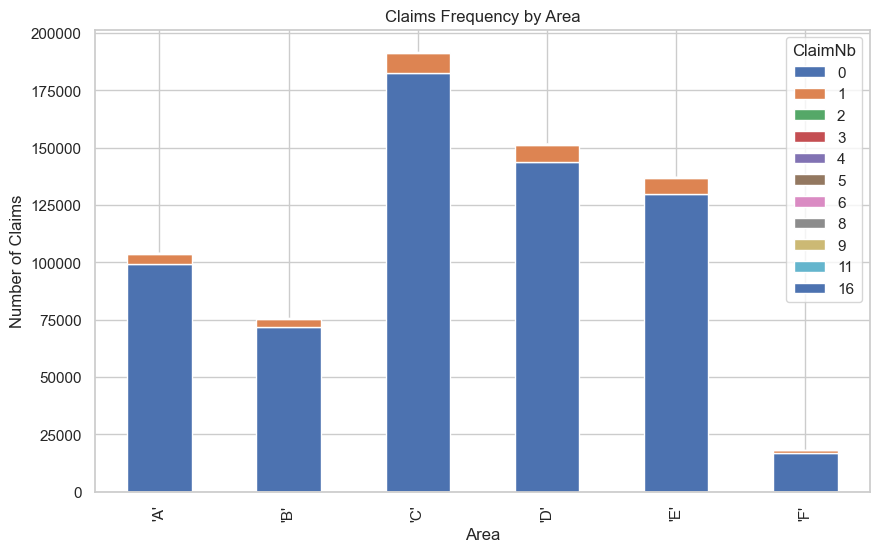

In [652]:
# Example for Area vs. ClaimNb
pd.crosstab(index=freq_df['Area'], columns=freq_df['ClaimNb']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Claims Frequency by Area')
plt.xlabel('Area')
plt.ylabel('Number of Claims')
plt.show()

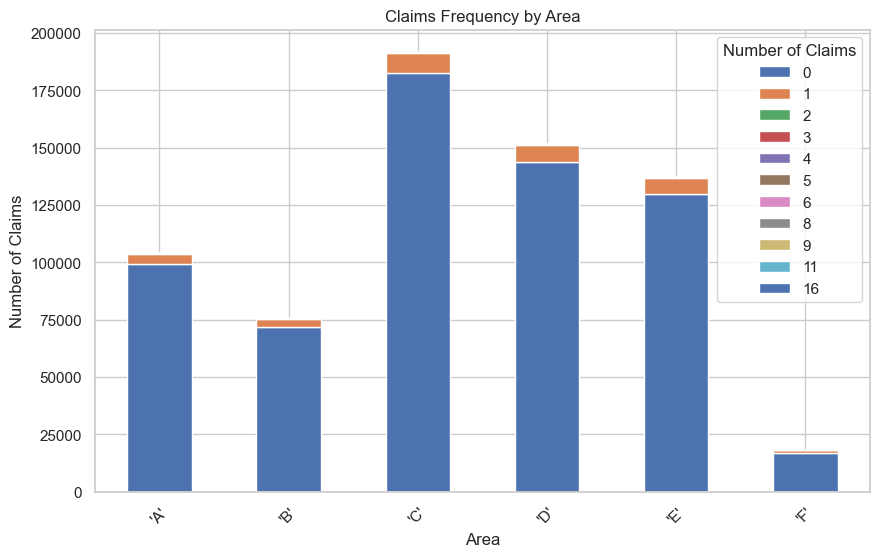

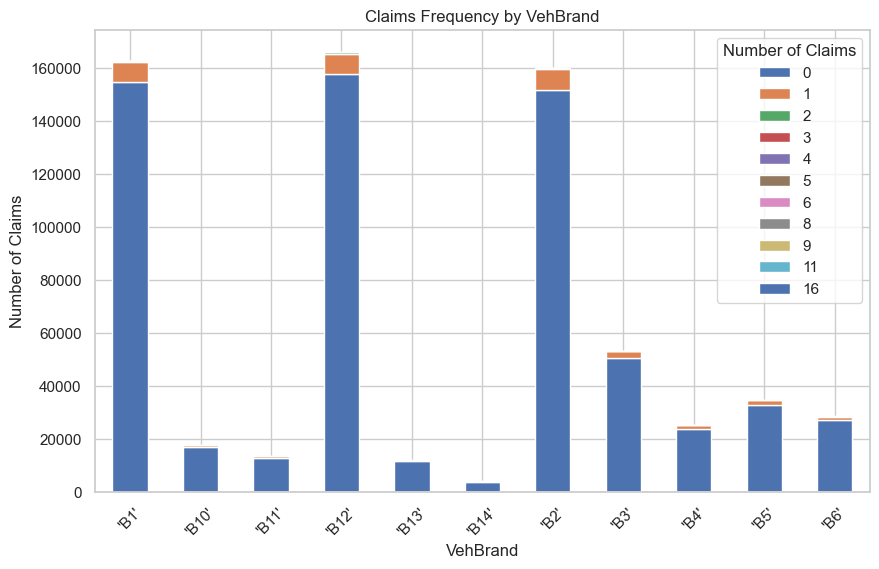

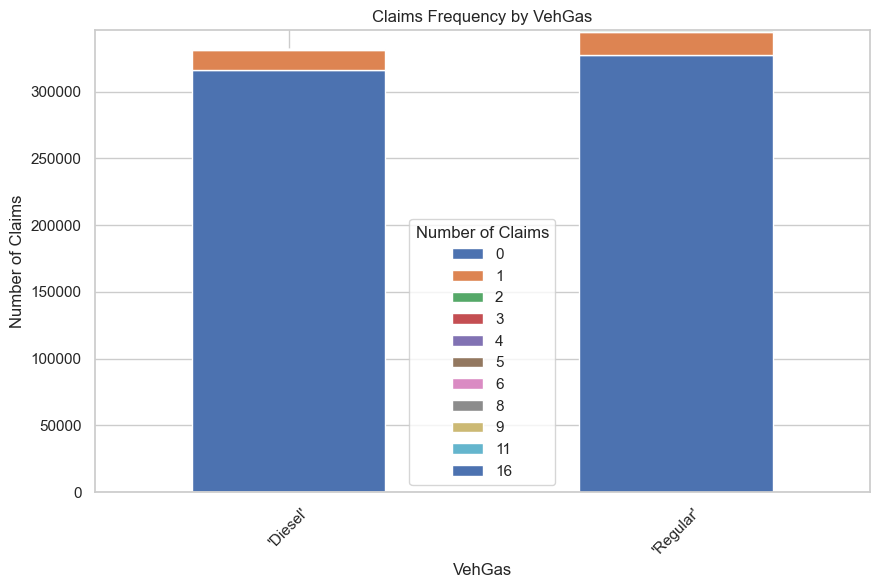

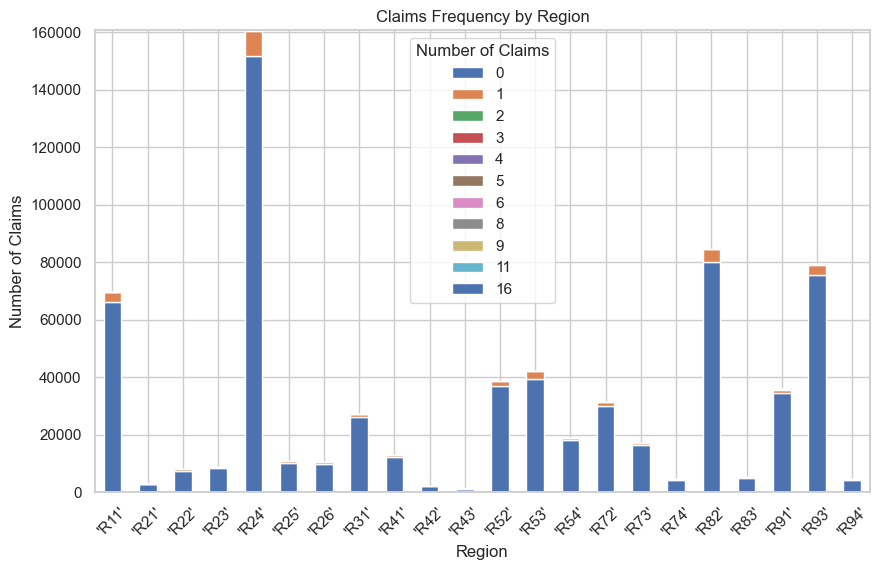

In [653]:
# Loop through each categorical variable and plot the claims frequency
for column in ['Area', 'VehBrand', 'VehGas', 'Region']:
    # Create a crosstab to summarize the data
    crosstab_result = pd.crosstab(index=freq_df[column], columns=freq_df['ClaimNb'])
    
    # Plotting the crosstab result
    crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Claims Frequency by {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Claims')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.legend(title='Number of Claims')
    plt.show()

In [654]:
## Are there policies with more than one claim?

# Establish connection to the SQLite database
conn = sqlite3.connect("virtual_database.db")

# SQL query to count claims per policy
query = """
SELECT s.IDpol, COUNT(s.IDpol) AS ClaimsCount
FROM sev_tab AS s
GROUP BY s.IDpol
HAVING COUNT(s.IDpol) > 1;
"""

# Execute query and load the data into a DataFrame
multiple_claims_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the results
print(multiple_claims_df.describe())

print("There are policies with more than one claim!")

              IDpol  ClaimsCount
count  1.379000e+03  1379.000000
mean   2.565711e+06     2.224801
std    1.641735e+06     2.341695
min    4.240000e+02     2.000000
25%    1.122868e+06     2.000000
50%    2.225849e+06     2.000000
75%    4.040748e+06     2.000000
max    6.113834e+06    66.000000
There are policies with more than one claim!


In [655]:
## Create Joined Dataframe of Severity and Freq Tables, while aggregating Claim Amount

# Establish connection to the SQLite database
conn = sqlite3.connect("virtual_database.db")

# SQL query to join frequency and severity tables
query = """
SELECT f.*, SUM(s.ClaimAmount) AS TotalClaimAmount
FROM freq_tab AS f
LEFT JOIN sev_tab AS s ON f.IDpol = s.IDpol
GROUP BY f.IDpol, f.ClaimNb, f.Exposure, f.Area, f.VehPower, f.VehAge, f.DrivAge, 
         f.BonusMalus, f.VehBrand, f.VehGas, f.Density, f.Region;
"""

# Execute query and load the data into a DataFrame
joined_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows to verify
print(joined_df.head())

print(joined_df.info())

   IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus   
0    1.0        1      0.10  'D'         5       0       55          50  \
1    3.0        1      0.77  'D'         5       0       55          50   
2    5.0        1      0.75  'B'         6       2       52          50   
3   10.0        1      0.09  'B'         7       0       46          50   
4   11.0        1      0.84  'B'         7       0       46          50   

  VehBrand     VehGas  Density Region  TotalClaimAmount  
0    'B12'  'Regular'     1217  'R82'               NaN  
1    'B12'  'Regular'     1217  'R82'               NaN  
2    'B12'   'Diesel'       54  'R22'               NaN  
3    'B12'   'Diesel'       76  'R72'               NaN  
4    'B12'   'Diesel'       76  'R72'               NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   --

In [656]:
joined_df.nunique()

IDpol               678013
ClaimNb                 11
Exposure               181
Area                     6
VehPower                12
VehAge                  78
DrivAge                 83
BonusMalus             115
VehBrand                11
VehGas                   2
Density               1607
Region                  22
TotalClaimAmount     12017
dtype: int64

In [657]:
# Fill NaN values in 'TotalClaimAmount' with 0
joined_df['TotalClaimAmount'].fillna(0, inplace=True)

# Display the first few rows to verify the change
print(joined_df.head())

# Re-check the info to see the update on non-null count
print(joined_df.info())

print(joined_df.describe())

print(joined_df.isna().sum())

   IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus   
0    1.0        1      0.10  'D'         5       0       55          50  \
1    3.0        1      0.77  'D'         5       0       55          50   
2    5.0        1      0.75  'B'         6       2       52          50   
3   10.0        1      0.09  'B'         7       0       46          50   
4   11.0        1      0.84  'B'         7       0       46          50   

  VehBrand     VehGas  Density Region  TotalClaimAmount  
0    'B12'  'Regular'     1217  'R82'               0.0  
1    'B12'  'Regular'     1217  'R82'               0.0  
2    'B12'   'Diesel'       54  'R22'               0.0  
3    'B12'   'Diesel'       76  'R72'               0.0  
4    'B12'   'Diesel'       76  'R72'               0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   --

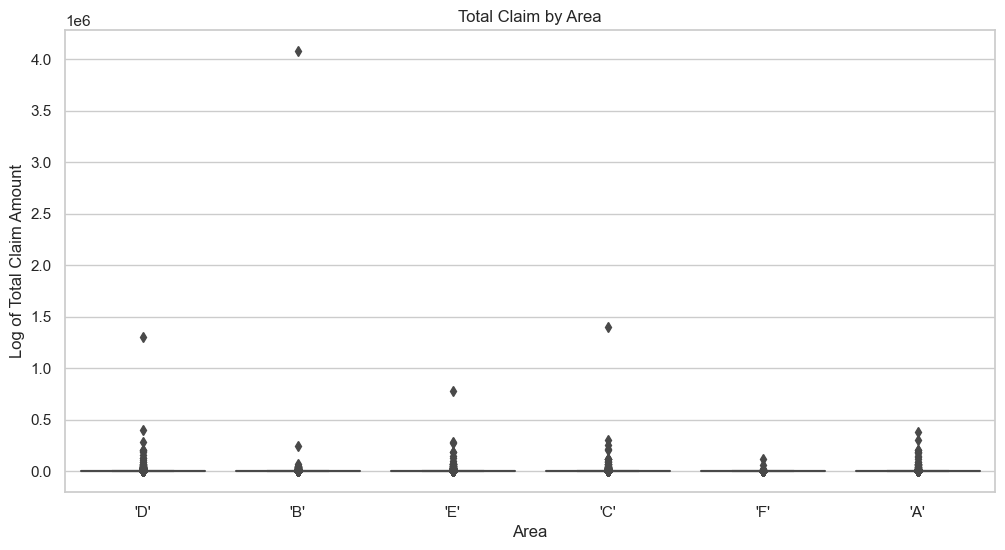

In [658]:
# Plot Total Claim Amount Against Area
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area', y='TotalClaimAmount', data=joined_df)
plt.title('Total Claim by Area')
plt.xlabel('Area')
plt.ylabel('Log of Total Claim Amount')
plt.show()

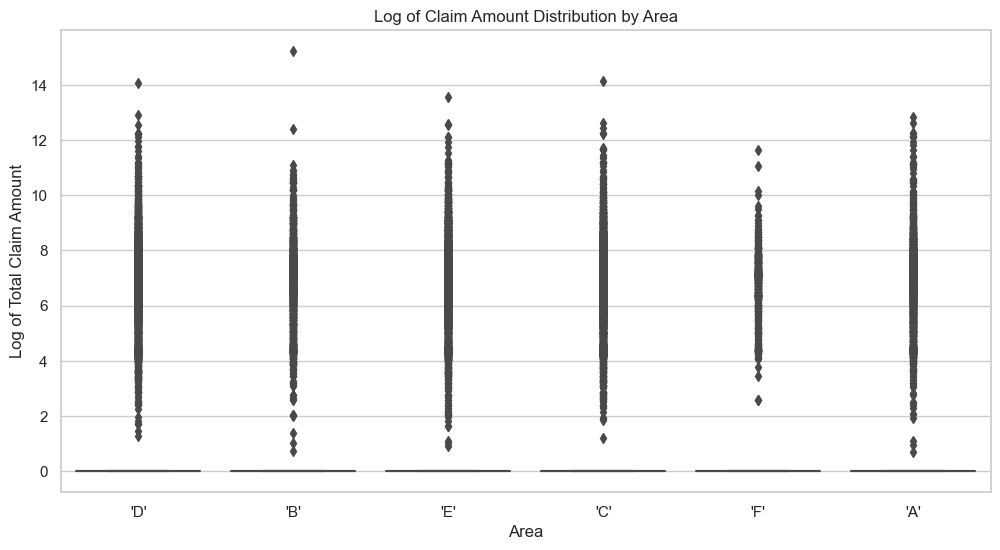

In [659]:
# Apply a log transformation to the 'ClaimAmount' to reduce skewness
joined_df['Log_ClaimAmount'] = np.log(joined_df['TotalClaimAmount'] + 1)  # Adding 1 to avoid log(0)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Area', y='Log_ClaimAmount', data=joined_df)
plt.title('Log of Claim Amount Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Log of Total Claim Amount')
plt.show()


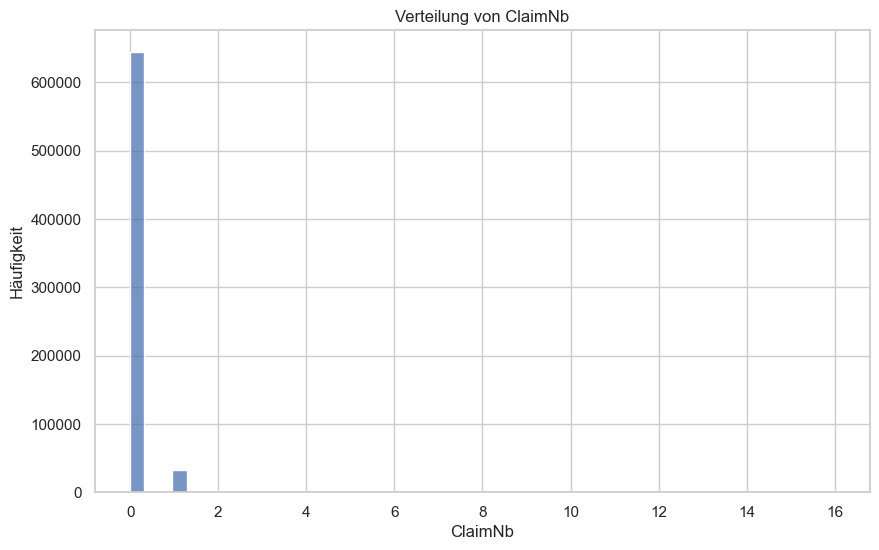

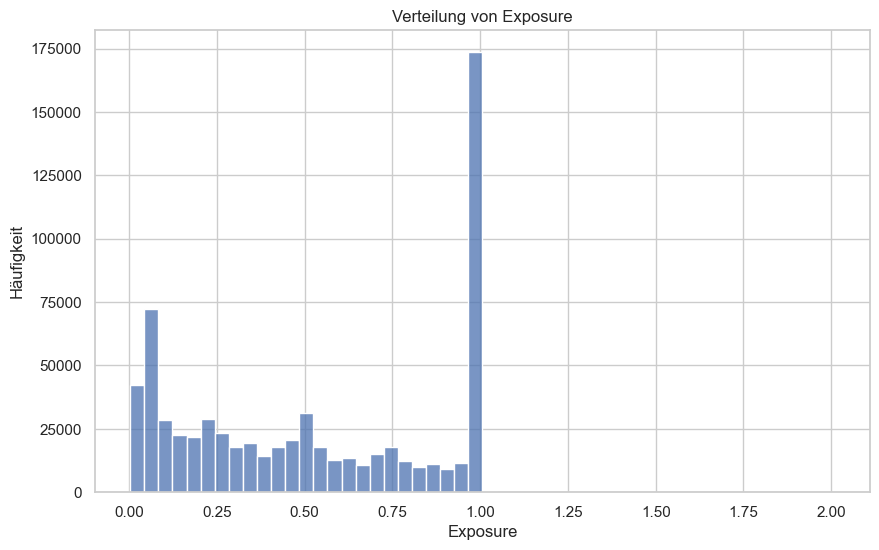

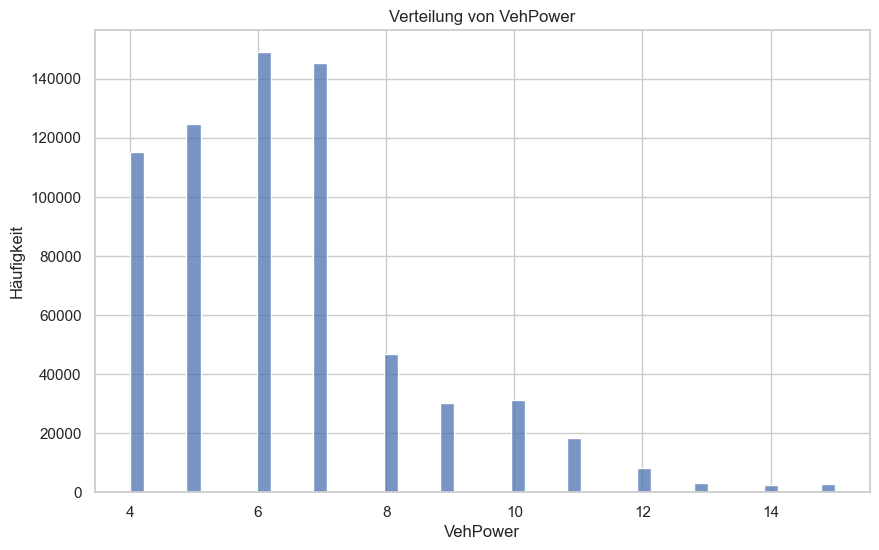

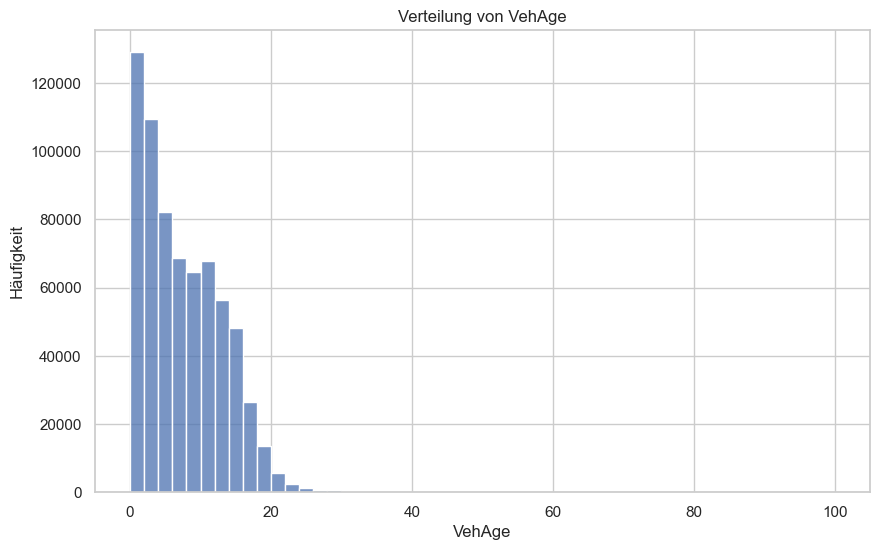

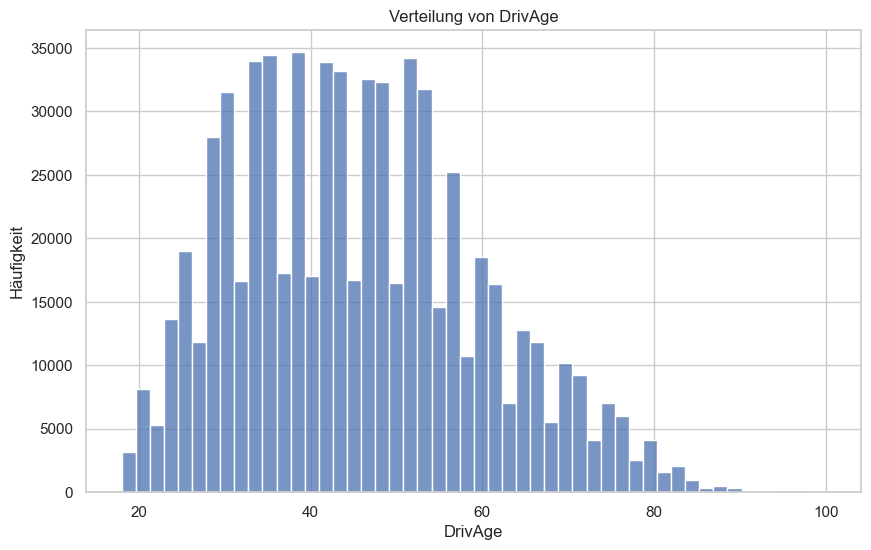

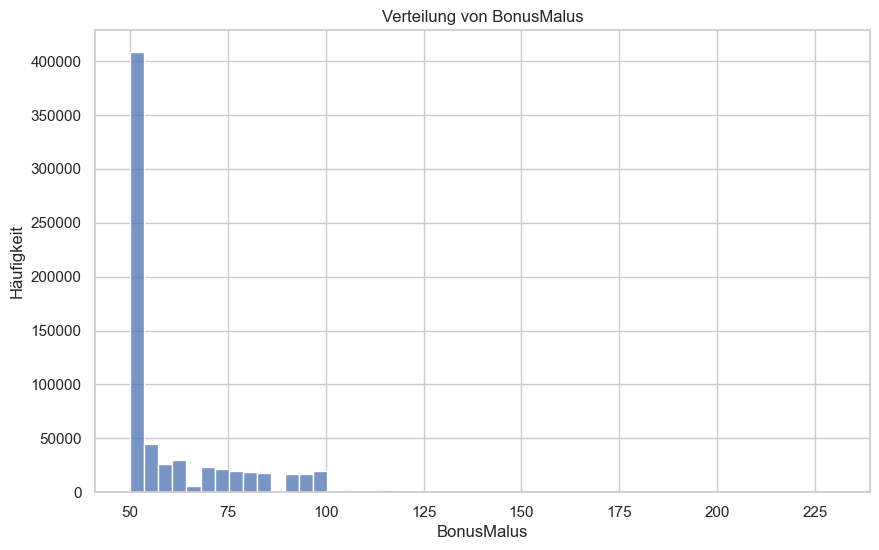

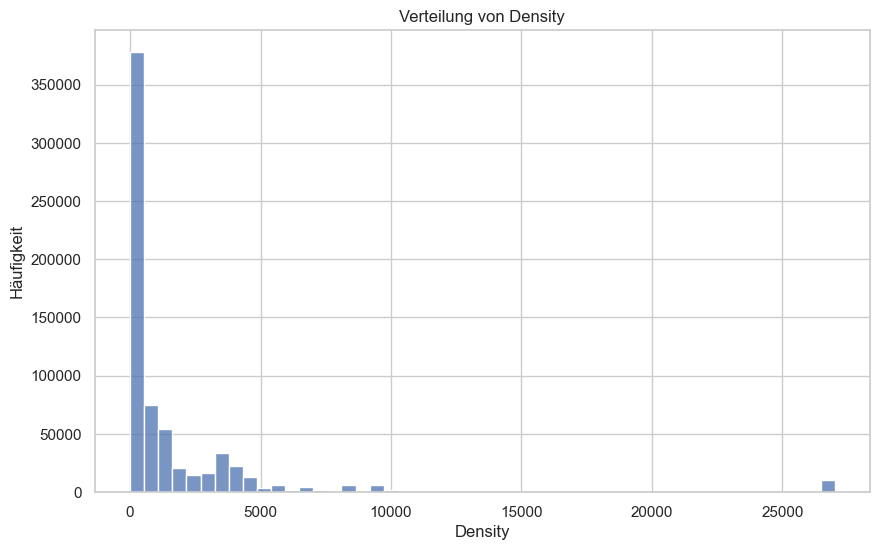

In [660]:
# List of Numeric Features in freq_df
numeric_vars_freq = ["ClaimNb", "Exposure", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"]

# Create Histograms for each Numeric Column
for var in numeric_vars_freq:
    plt.figure(figsize=(10, 6))
    sns.histplot(freq_df[var], kde=False, bins=50) 
    plt.title(f'Verteilung von {var}')
    plt.xlabel(var)
    plt.ylabel('Häufigkeit')
    plt.show()

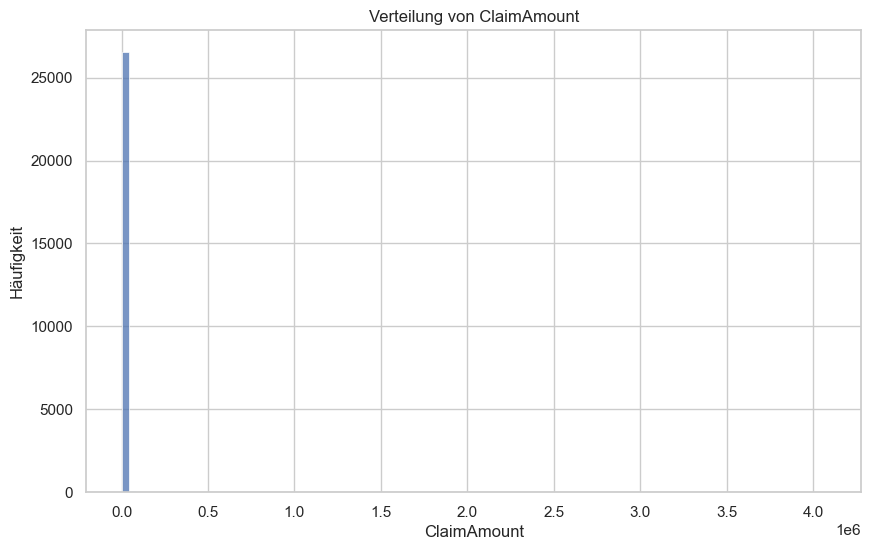

In [661]:
# Create Histogram for Claim Amount
plt.figure(figsize=(10, 6))
sns.histplot(sev_df["ClaimAmount"], kde=False, bins=100) 
plt.title(f'Verteilung von ClaimAmount')
plt.xlabel('ClaimAmount')
plt.ylabel('Häufigkeit')
plt.show()

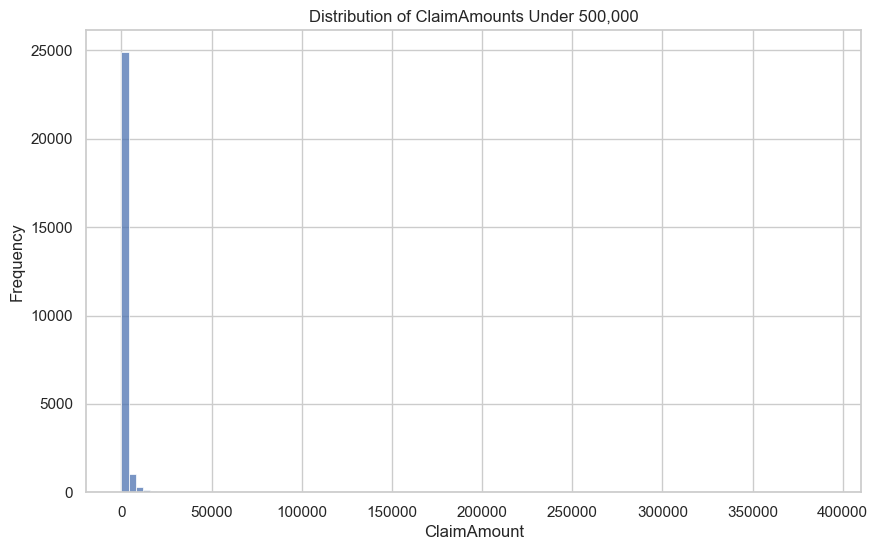

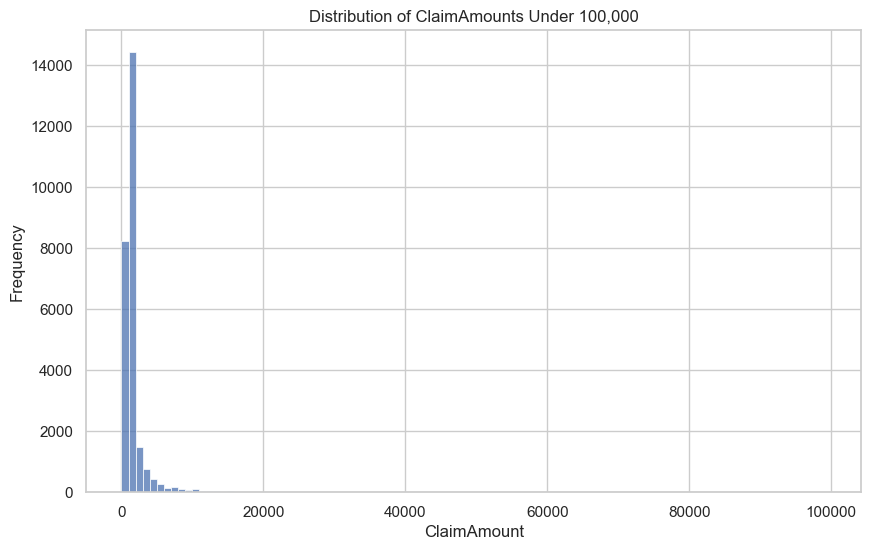

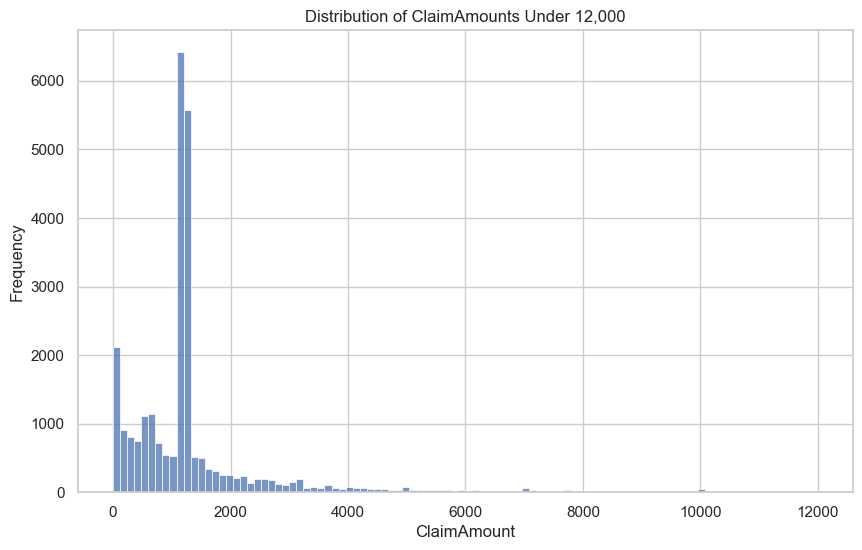

In [662]:
# Filter claims > 500,000
filtered_claims_500k = sev_df[sev_df['ClaimAmount'] < 500000]
filtered_claims_above_500k = sev_df[sev_df['ClaimAmount'] >= 500000]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_claims_500k['ClaimAmount'], kde=False, bins=100) 
plt.title('Distribution of ClaimAmounts Under 500,000')
plt.xlabel('ClaimAmount')
plt.ylabel('Frequency')
plt.show()

# Filter claims > 100,000
filtered_claims_100k = sev_df[sev_df['ClaimAmount'] < 100000]
filtered_claims_above_100k = sev_df[sev_df['ClaimAmount'] >= 100000]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_claims_100k['ClaimAmount'], kde=False, bins=100) 
plt.title('Distribution of ClaimAmounts Under 100,000')
plt.xlabel('ClaimAmount')
plt.ylabel('Frequency')
plt.show()

# Filter claims > 12,000
filtered_claims_12k = sev_df[sev_df['ClaimAmount'] < 12000]
filtered_claims_above_12k = sev_df[sev_df['ClaimAmount'] >= 12000]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_claims_12k['ClaimAmount'], kde=False, bins=100)  
plt.title('Distribution of ClaimAmounts Under 12,000')
plt.xlabel('ClaimAmount')
plt.ylabel('Frequency')
plt.show()

In [663]:
filtered_claims_above_12k

,IDpol,ClaimAmount
7,4020812,54942.62
80,4007562,15139.64
96,4055372,17616.93
134,4036493,31430.49
142,4001936,73831.86
...,...,...
26219,2225771,55000.00
26239,2266429,20000.00
26268,3254084,30000.00
26274,3234374,75000.00


In [664]:
len(filtered_claims_above_100k)

42

In [665]:
filtered_claims_above_500k

,IDpol,ClaimAmount
9756,1120377,4075400.56
11637,2141337,1301172.60
15768,110846,1403057.40
17992,3122016,774411.50


In [666]:
# Sum total Claim Amount
total_claims_sum = sev_df['ClaimAmount'].sum()

# Sum of claims greater than 12,000
sum_claims_above_12k = sev_df[sev_df['ClaimAmount'] > 12000]['ClaimAmount'].sum()

# Sum of claims greater than 100,000
sum_claims_above_100k = sev_df[sev_df['ClaimAmount'] > 100000]['ClaimAmount'].sum()

# Calculate fractions
fraction_above_12k = sum_claims_above_12k / total_claims_sum
fraction_above_100k = sum_claims_above_100k / total_claims_sum

print("Fraction of total claims accounted for by claims over 12,000:", fraction_above_12k)
print("Fraction of total claims accounted for by claims over 100,000:", fraction_above_100k)


Fraction of total claims accounted for by claims over 12,000: 0.40856524715382597
Fraction of total claims accounted for by claims over 100,000: 0.2460301595573274


In [667]:
policies_above_500k = joined_df[joined_df['IDpol'].isin(filtered_claims_above_500k['IDpol'])]
policies_above_500k

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,TotalClaimAmount,Log_ClaimAmount
54317,110846.0,2,0.43,'C',6,13,20,100,'B1','Regular',203,'R24',1404185.52,14.154969
150027,1120377.0,1,0.22,'B',9,13,19,100,'B2','Regular',93,'R24',4075400.56,15.220480
270621,2141337.0,1,0.32,'D',4,14,18,100,'B2','Regular',863,'R82',1301172.60,14.078777
416629,3122016.0,1,0.91,'E',7,7,40,63,'B11','Diesel',9307,'R82',774411.50,13.559860


In [668]:
policies_above_12k = joined_df[joined_df['IDpol'].isin(filtered_claims_above_12k['IDpol'])]
policies_above_100k = joined_df[joined_df['IDpol'].isin(filtered_claims_above_100k['IDpol'])]
policies_above_12k.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,TotalClaimAmount,Log_ClaimAmount
count,3.860000e+02,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,3.860000e+02,386.000000
mean,2.206543e+06,1.176166,0.548768,6.590674,6.994819,44.362694,67.803109,1756.349741,6.385285e+04,10.331683
std,1.575897e+06,0.444361,0.334298,2.048329,5.059642,16.262076,21.904102,3039.068864,2.352548e+05,0.896837
min,3.897000e+03,1.000000,0.008197,4.000000,0.000000,18.000000,50.000000,4.000000,1.200000e+04,9.392745
25%,1.075596e+06,1.000000,0.242500,5.000000,2.000000,32.000000,50.000000,108.250000,1.577492e+04,9.666238
50%,2.133154e+06,1.000000,0.505000,6.000000,7.000000,43.000000,57.500000,596.000000,2.347730e+04,10.063832
75%,3.163483e+06,1.000000,0.890000,7.000000,11.000000,54.000000,80.000000,2399.000000,4.393741e+04,10.690544
max,6.111084e+06,5.000000,1.000000,14.000000,21.000000,83.000000,156.000000,27000.000000,4.075401e+06,15.220480


In [669]:
joined_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,TotalClaimAmount,Log_ClaimAmount
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01,0.253765
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03,1.316532
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,0.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,15.220480


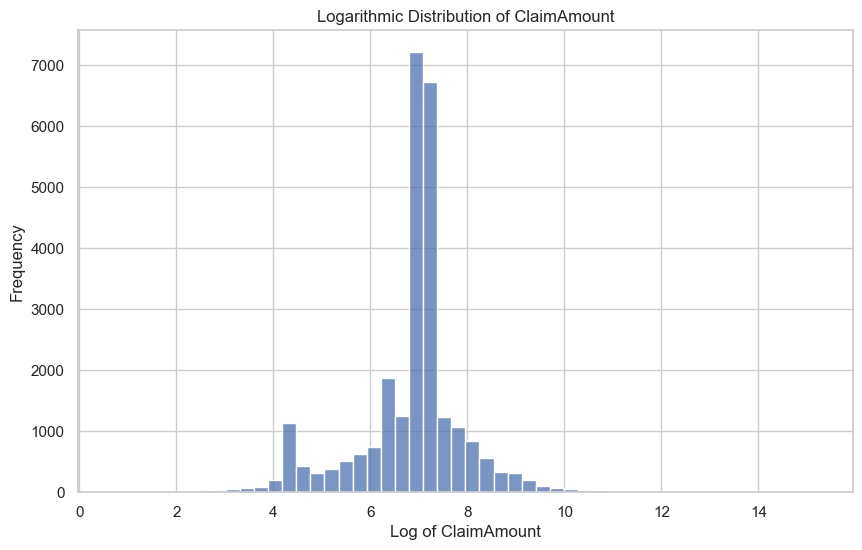

In [670]:
# Load your data
# For demonstration, I'm assuming you've loaded your data into a DataFrame 'sev_df'

# Since logarithm of zero is undefined, we'll add a small constant to the ClaimAmount before taking the log.
# We use a small value to replace 0 (which log cannot process)
sev_df['log_ClaimAmount'] = np.log(sev_df['ClaimAmount'] + 1)

plt.figure(figsize=(10, 6))
sns.histplot(sev_df['log_ClaimAmount'], kde=False, bins=50)
plt.title('Logarithmic Distribution of ClaimAmount')
plt.xlabel('Log of ClaimAmount')
plt.ylabel('Frequency')
plt.show()

In [671]:
# Count the number of claims where 'ClaimNb' is 0
num_claims_zero = joined_df[joined_df['ClaimNb'] == 0]['ClaimNb'].count()

# Display the result
print("Number of claims with ClaimNb = 0:", num_claims_zero)

num_claims_zero/len(joined_df)

Number of claims with ClaimNb = 0: 643953


0.9497649750078538

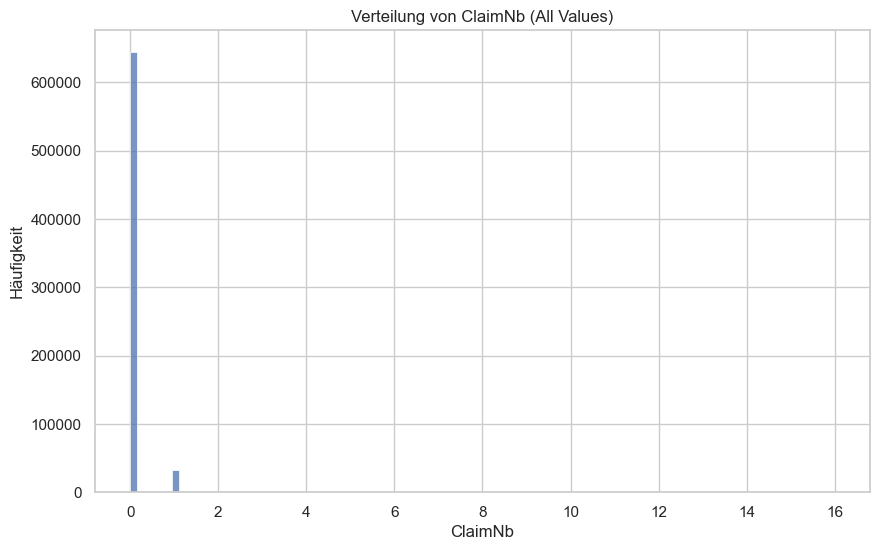

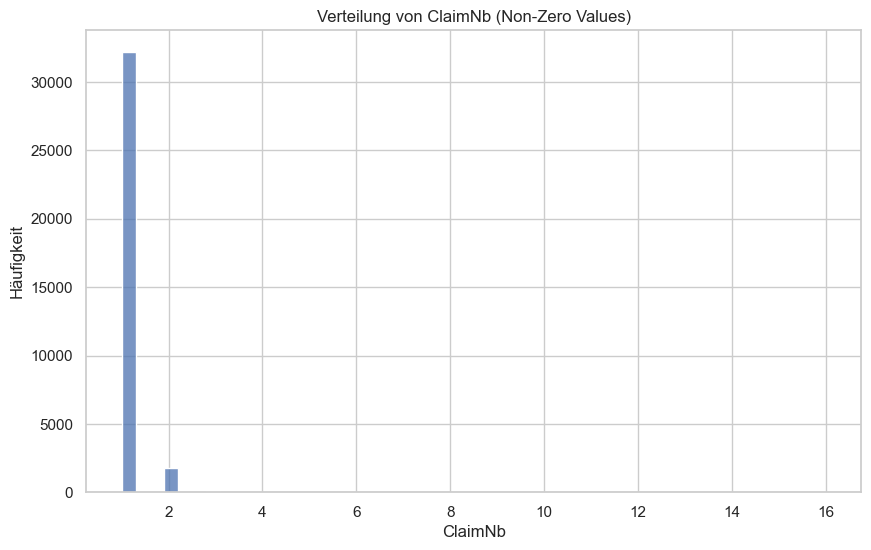

In [672]:
# Plot histogram for all ClaimNb values
plt.figure(figsize=(10, 6))
sns.histplot(freq_df['ClaimNb'], kde=False, bins=100)  # Adjust bin size as needed
plt.title('Verteilung von ClaimNb (All Values)')
plt.xlabel('ClaimNb')
plt.ylabel('Häufigkeit')
plt.show()

# Ensure that 'ClaimNb' values are correctly filtered to exclude zeros
non_zero_claims = freq_df[freq_df['ClaimNb'] > 0]['ClaimNb']

# Plot histogram only for non-zero ClaimNb values
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_claims, kde=False, bins=50)  # You may adjust the bins if needed
plt.title('Verteilung von ClaimNb (Non-Zero Values)')
plt.xlabel('ClaimNb')
plt.ylabel('Häufigkeit')
plt.show()

In [673]:
non_zero_claims.describe()

count    34060.000000
mean         1.059953
std          0.284027
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: ClaimNb, dtype: float64

In [674]:
# Count the number of policies with exactly one claim
num_policies_zero_claim = joined_df[joined_df['ClaimNb'] == 0]['ClaimNb'].count()

# Count the number of policies with exactly one claim
num_policies_one_claim = joined_df[joined_df['ClaimNb'] == 1]['ClaimNb'].count()

# Count the number of policies with more than one claim
num_policies_more_than_one_claim = joined_df[joined_df['ClaimNb'] > 1]['ClaimNb'].count()

# Display the results
print("Number of policies with exactly zero claims:", num_policies_zero_claim)
print("Number of policies with exactly one claim:", num_policies_one_claim)
print("Number of policies with more than one claim:", num_policies_more_than_one_claim)

print(num_policies_zero_claim/len(joined_df))
print(num_policies_one_claim/len(joined_df))
print(num_policies_more_than_one_claim/len(joined_df))

Number of policies with exactly zero claims: 643953
Number of policies with exactly one claim: 32178
Number of policies with more than one claim: 1882
0.9497649750078538
0.04745926700520491
0.0027757579869412533


In [675]:
# Count the number of policies with exactly zero claims
policies_above_12k_zero_claims = policies_above_12k[policies_above_12k['ClaimNb'] == 0]['ClaimNb'].count()

# Count the number of policies with exactly one claim
policies_above_12k_one_claim = policies_above_12k[policies_above_12k['ClaimNb'] == 1]['ClaimNb'].count()

# Count the number of policies with more than one claim
policies_above_12k_more_than_one_claim = policies_above_12k[policies_above_12k['ClaimNb'] > 1]['ClaimNb'].count()

# Display the results
print("Number of policies with exactly zero claims:", policies_above_12k_zero_claims)
print("Number of policies with exactly one claim:", policies_above_12k_one_claim)
print("Number of policies with more than one claim:", policies_above_12k_more_than_one_claim)

print(policies_above_12k_zero_claims/len(policies_above_12k))
print(policies_above_12k_one_claim/len(policies_above_12k))
print(policies_above_12k_more_than_one_claim/len(policies_above_12k))

Number of policies with exactly zero claims: 0
Number of policies with exactly one claim: 325
Number of policies with more than one claim: 61
0.0
0.8419689119170984
0.15803108808290156


In [676]:
# Count the number of policies with exactly zero claims
policies_above_100k_zero_claims = policies_above_100k[policies_above_100k['ClaimNb'] == 0]['ClaimNb'].count()

# Count the number of policies with exactly one claim
policies_above_100k_one_claim = policies_above_100k[policies_above_100k['ClaimNb'] == 1]['ClaimNb'].count()

# Count the number of policies with more than one claim
policies_above_100k_more_than_one_claim = policies_above_100k[policies_above_100k['ClaimNb'] > 1]['ClaimNb'].count()

# Display the results
print("Number of policies with exactly zero claims:", policies_above_100k_zero_claims)
print("Number of policies with exactly one claim:", policies_above_100k_one_claim)
print("Number of policies with more than one claim:", policies_above_100k_more_than_one_claim)

print(policies_above_100k_zero_claims/len(policies_above_100k))
print(policies_above_100k_one_claim/len(policies_above_100k))
print(policies_above_100k_more_than_one_claim/len(policies_above_100k))

Number of policies with exactly zero claims: 0
Number of policies with exactly one claim: 34
Number of policies with more than one claim: 7
0.0
0.8292682926829268
0.17073170731707318


In [677]:
# Count the number of rows where 'ClaimNb' is 1 and 'TotalClaimAmount' is 0
num_claims_one_amount_zero = joined_df[(joined_df['ClaimNb'] == 1) & (joined_df['TotalClaimAmount'] == 0)].shape[0]

# Display the result
print("Number of claims with ClaimNb = 1 and TotalClaimAmount = 0:", num_claims_one_amount_zero)

# 
print("Claims with ClaimNb = 1 and ClaimAmount = 0 / Claims with ClaimNb = 1:")
print(8608/32178)

print("Number of Non-Zero Claims / Claims with ClaimNb = 1:")
print(8608/len(non_zero_claims))


Number of claims with ClaimNb = 1 and TotalClaimAmount = 0: 8608
Claims with ClaimNb = 1 and ClaimAmount = 0 / Claims with ClaimNb = 1:
0.2675119646963764
Number of Non-Zero Claims / Claims with ClaimNb = 1:
0.252730475631239


In [678]:
len(non_zero_claims)

34060

## Correlation Matrix

In [679]:
# Select Numerical Columns
numeric_freq_df = freq_df.select_dtypes(include=[np.number])

# Create Correlation Matrix
correlation_matrix = numeric_freq_df.corr()

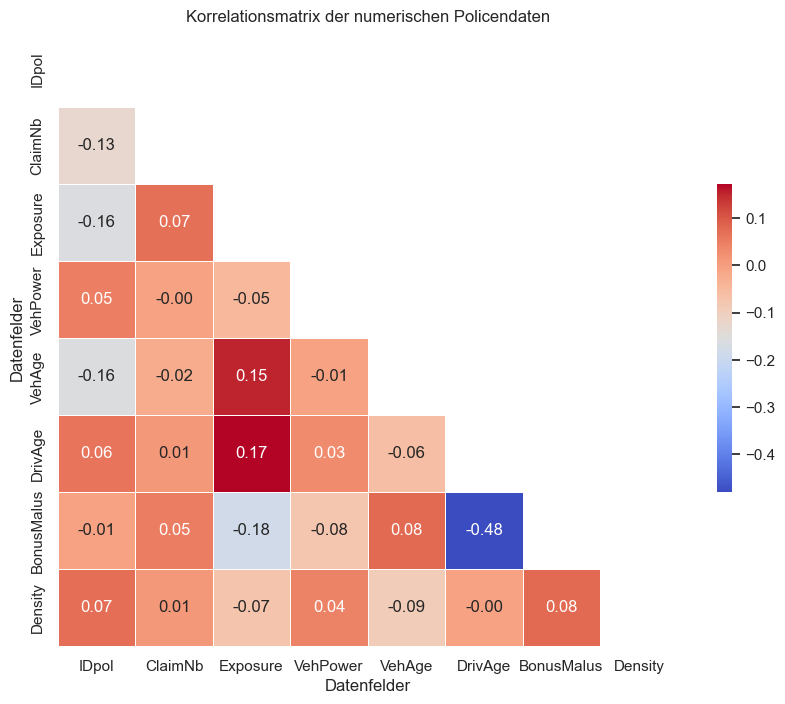

In [680]:
# Setze den Stil des Plots
sns.set(style="white")

# Erzeuge eine Maske für die obere Dreiecksmatrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Setze die Größe des matplotlib Figure
plt.figure(figsize=(10, 8))

# Zeichne die Heatmap mit der Maske und korrekter Seitenverhältniseinstellung
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .5})

# Füge Titel und Achsenbeschriftungen hinzu
plt.title('Korrelationsmatrix der numerischen Policendaten')
plt.xlabel('Datenfelder')
plt.ylabel('Datenfelder')

# Zeige den Plot an
plt.show()

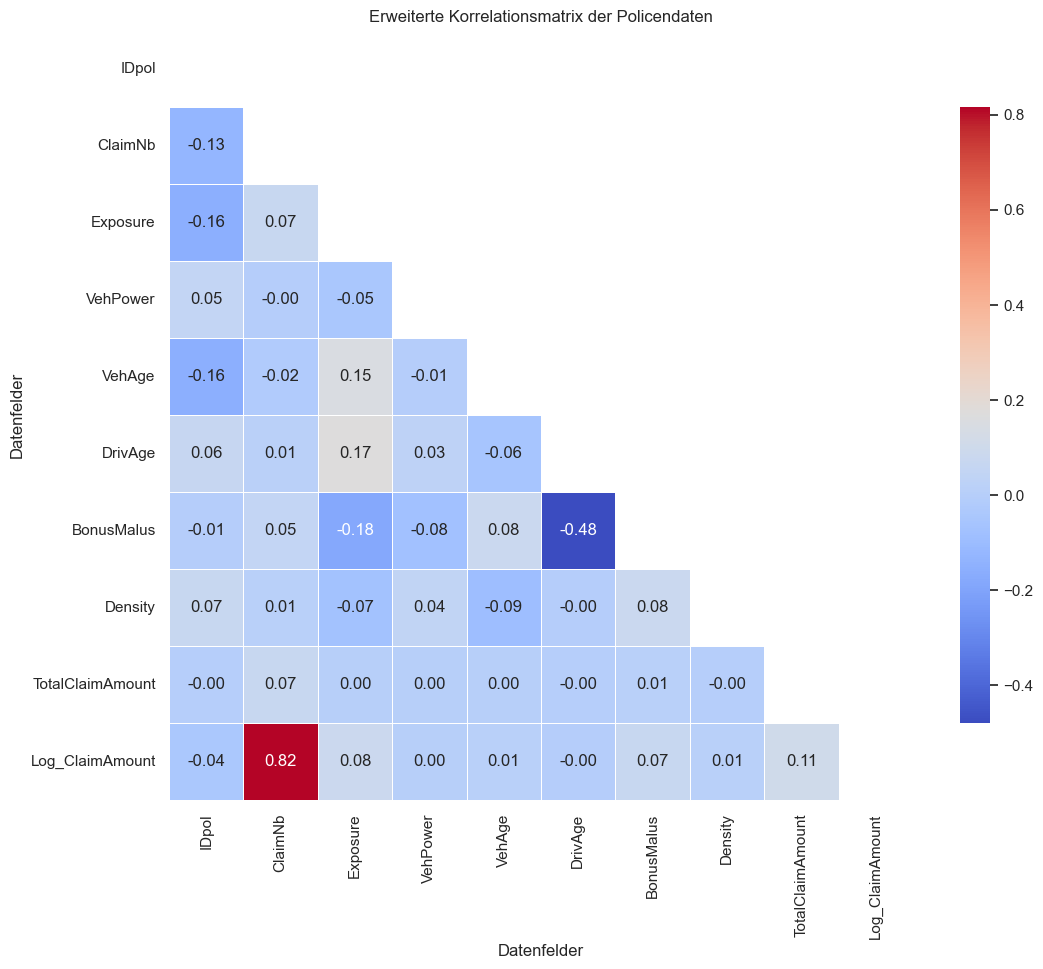

In [681]:
# Select only numeric columns for the correlation matrix
numeric_cols = joined_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

# Visualization code remains the same
sns.set(style="white")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Erweiterte Korrelationsmatrix der Policendaten')
plt.xlabel('Datenfelder')
plt.ylabel('Datenfelder')
plt.show()


## 2 - Data Preperation

In [682]:
# Convert ClaimNb into a categorical variable with categories 0, 1, and More than one
joined_df['ClaimNb_Cat'] = joined_df['ClaimNb'].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else 'More than one'))

# Check the first few rows to ensure the transformation was applied correctly
print(joined_df[['ClaimNb', 'ClaimNb_Cat']].head())

   ClaimNb ClaimNb_Cat
0        1           1
1        1           1
2        1           1
3        1           1
4        1           1


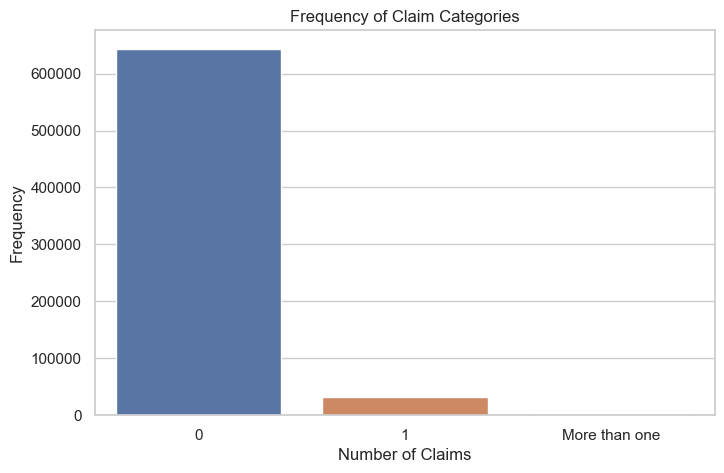

In [683]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the frequency of each category in 'ClaimNb_Cat'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='ClaimNb_Cat', data=joined_df, order=['0', '1', 'More than one'])
plt.title('Frequency of Claim Categories')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the labels on the x-axis readable
plt.show()

In [684]:
# Assuming joined_df is your existing DataFrame
filtered_df = joined_df[joined_df['TotalClaimAmount'] <= 100000]

# Displaying the first few rows of the filtered DataFrame to verify
print(filtered_df.head())

# Check Plausibility of the length of the data frame
len(filtered_df)/len(joined_df)

   IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus   
0    1.0        1      0.10  'D'         5       0       55          50  \
1    3.0        1      0.77  'D'         5       0       55          50   
2    5.0        1      0.75  'B'         6       2       52          50   
3   10.0        1      0.09  'B'         7       0       46          50   
4   11.0        1      0.84  'B'         7       0       46          50   

  VehBrand     VehGas  Density Region  TotalClaimAmount  Log_ClaimAmount   
0    'B12'  'Regular'     1217  'R82'               0.0              0.0  \
1    'B12'  'Regular'     1217  'R82'               0.0              0.0   
2    'B12'   'Diesel'       54  'R22'               0.0              0.0   
3    'B12'   'Diesel'       76  'R72'               0.0              0.0   
4    'B12'   'Diesel'       76  'R72'               0.0              0.0   

  ClaimNb_Cat  
0           1  
1           1  
2           1  
3           1  
4           

0.9999380542850949

## 3. - Datenanalyse

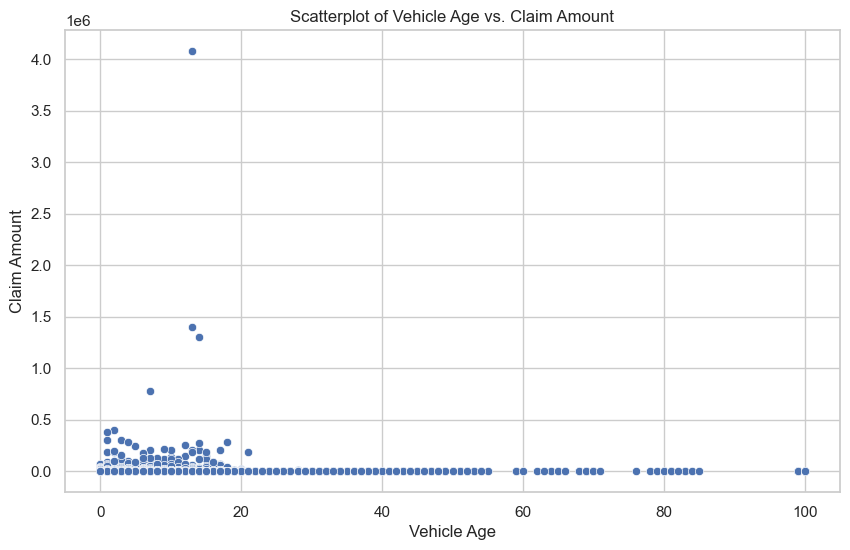

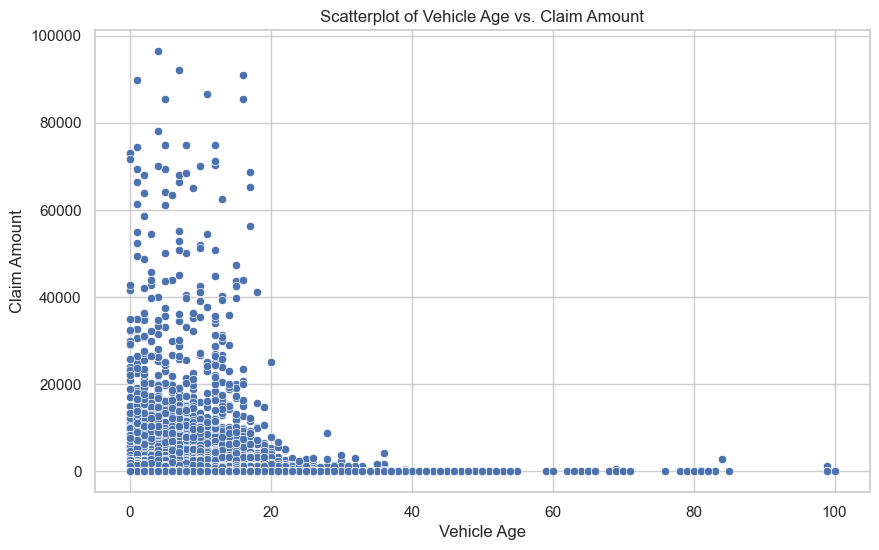

In [685]:
# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VehAge', y='TotalClaimAmount', data=joined_df)
plt.title('Scatterplot of Vehicle Age vs. Claim Amount')
plt.xlabel('Vehicle Age')
plt.ylabel('Claim Amount')
plt.show()

# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VehAge', y='TotalClaimAmount', data=filtered_df)
plt.title('Scatterplot of Vehicle Age vs. Claim Amount')
plt.xlabel('Vehicle Age')
plt.ylabel('Claim Amount')
plt.show()

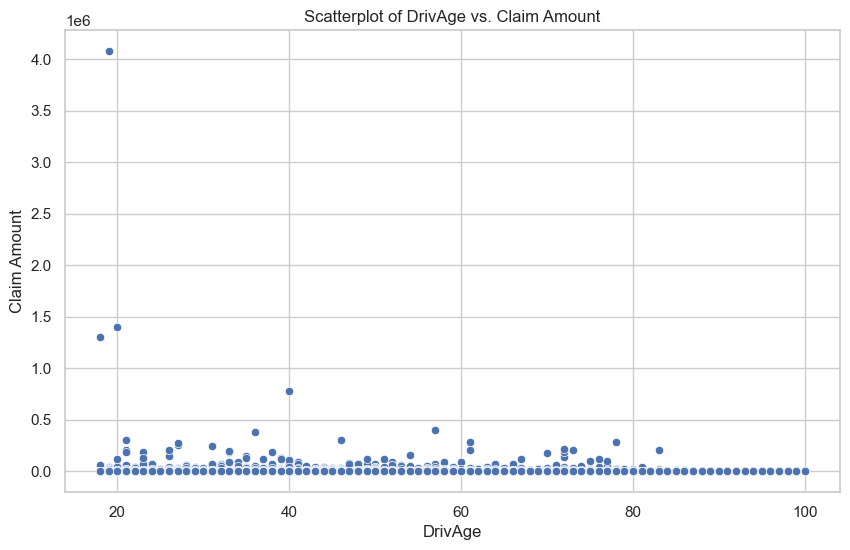

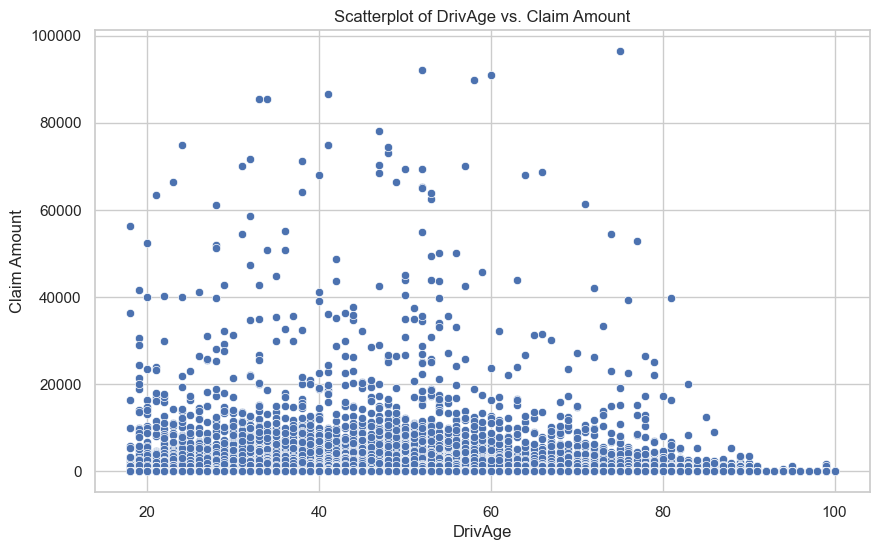

In [686]:
# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DrivAge', y='TotalClaimAmount', data=joined_df)
plt.title('Scatterplot of DrivAge vs. Claim Amount')
plt.xlabel('DrivAge')
plt.ylabel('Claim Amount')
plt.show()

# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DrivAge', y='TotalClaimAmount', data=filtered_df)
plt.title('Scatterplot of DrivAge vs. Claim Amount')
plt.xlabel('DrivAge')
plt.ylabel('Claim Amount')
plt.show()

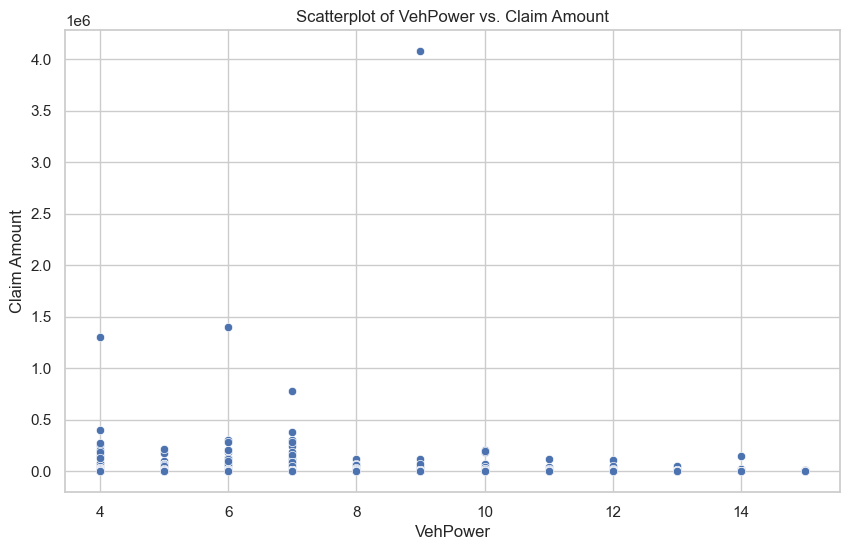

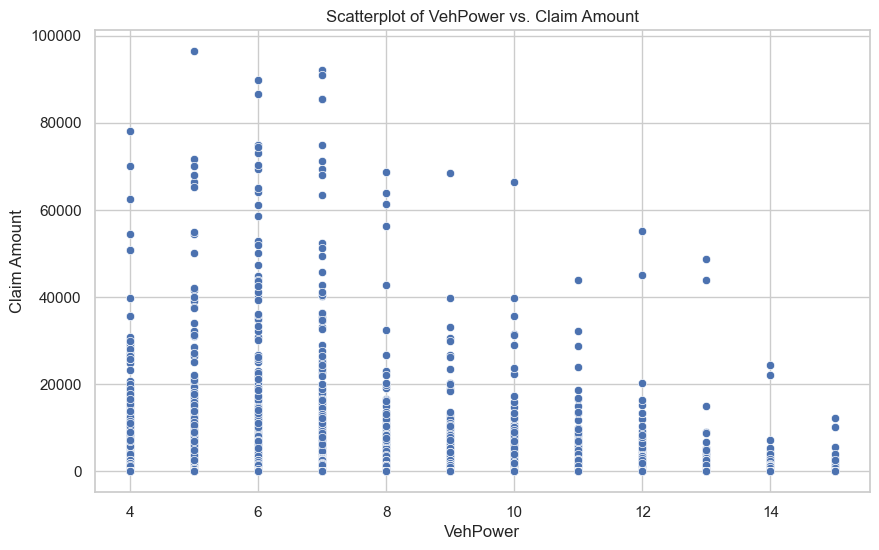

In [687]:
# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VehPower', y='TotalClaimAmount', data=joined_df)
plt.title('Scatterplot of VehPower vs. Claim Amount')
plt.xlabel('VehPower')
plt.ylabel('Claim Amount')
plt.show()

# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VehPower', y='TotalClaimAmount', data=filtered_df)
plt.title('Scatterplot of VehPower vs. Claim Amount')
plt.xlabel('VehPower')
plt.ylabel('Claim Amount')
plt.show()

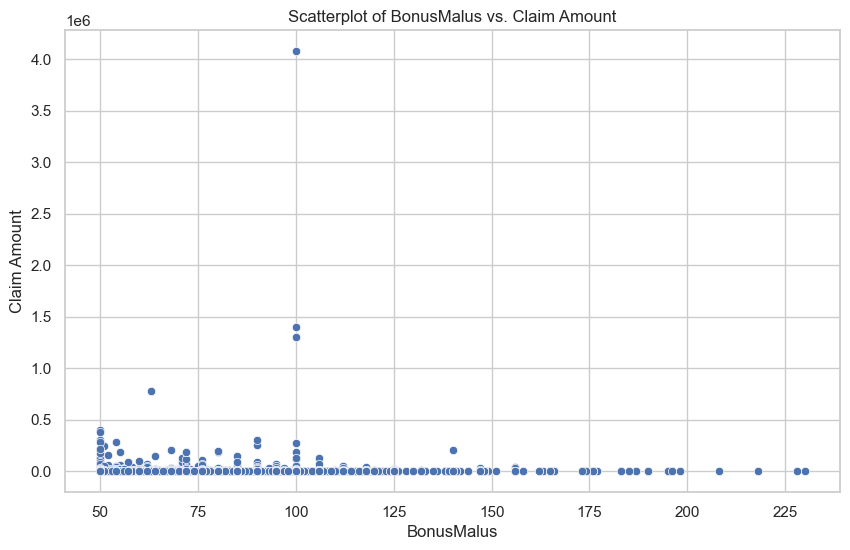

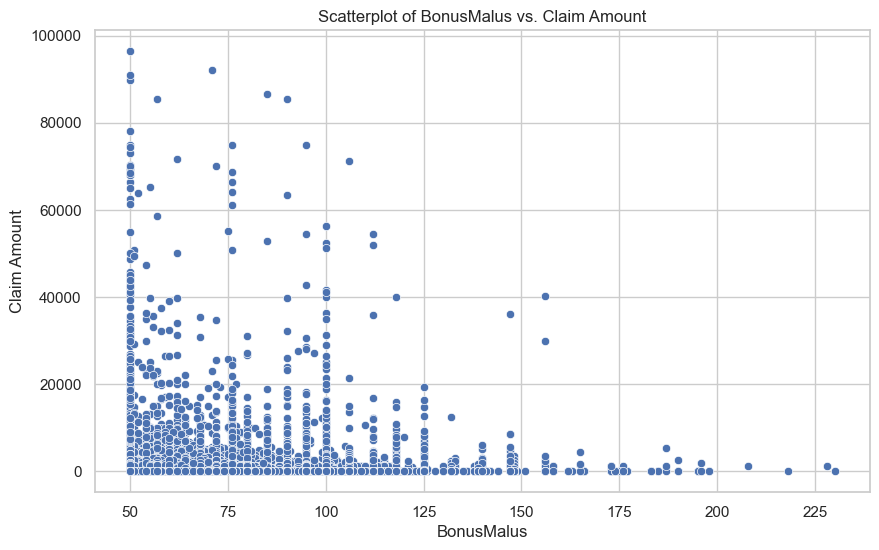

In [688]:
# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BonusMalus', y='TotalClaimAmount', data=joined_df)
plt.title('Scatterplot of BonusMalus vs. Claim Amount')
plt.xlabel('BonusMalus')
plt.ylabel('Claim Amount')
plt.show()

# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BonusMalus', y='TotalClaimAmount', data=filtered_df)
plt.title('Scatterplot of BonusMalus vs. Claim Amount')
plt.xlabel('BonusMalus')
plt.ylabel('Claim Amount')
plt.show()

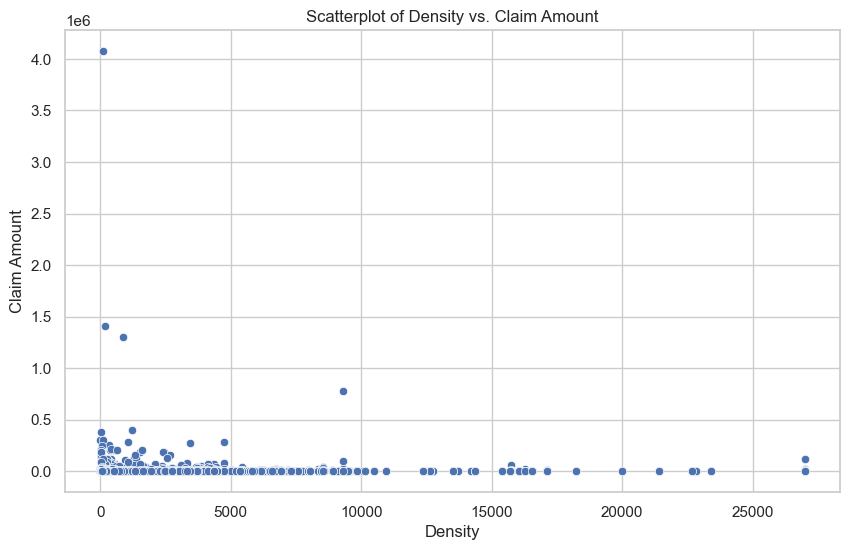

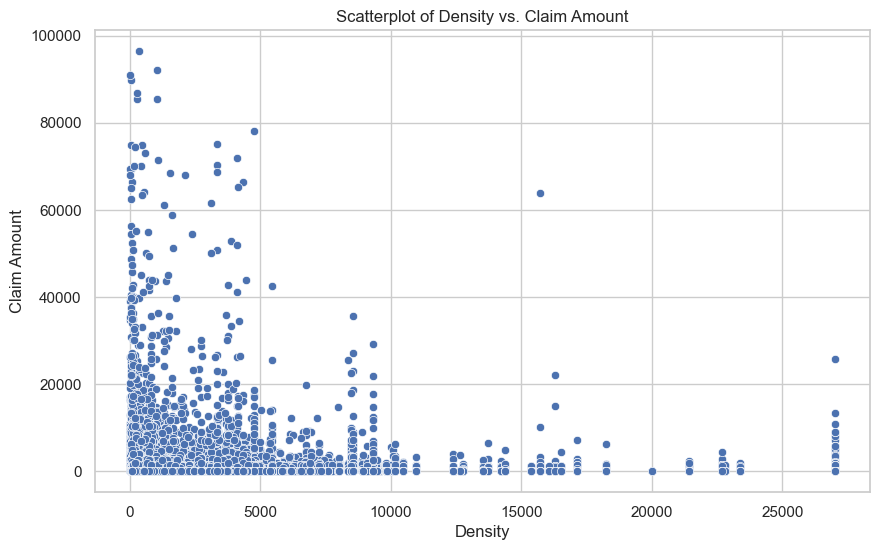

In [689]:
# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density', y='TotalClaimAmount', data=joined_df)
plt.title('Scatterplot of Density vs. Claim Amount')
plt.xlabel('Density')
plt.ylabel('Claim Amount')
plt.show()

# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density', y='TotalClaimAmount', data=filtered_df)
plt.title('Scatterplot of Density vs. Claim Amount')
plt.xlabel('Density')
plt.ylabel('Claim Amount')
plt.show()

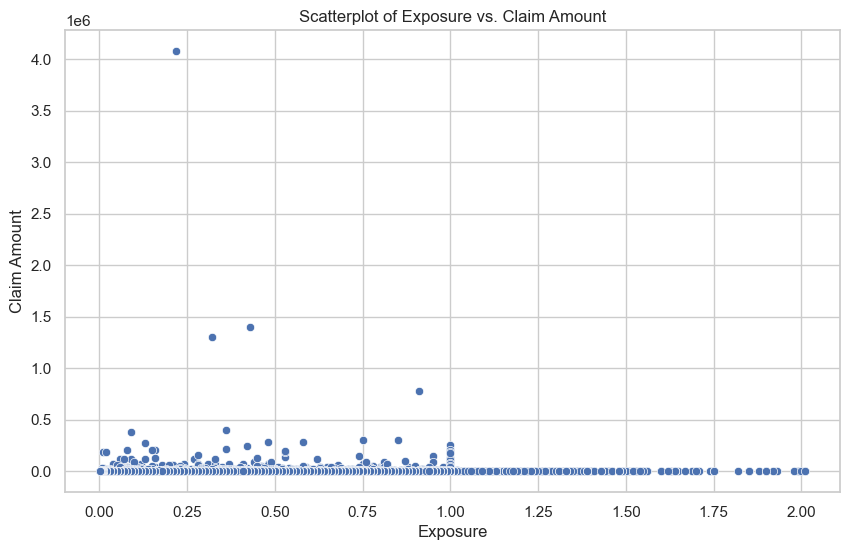

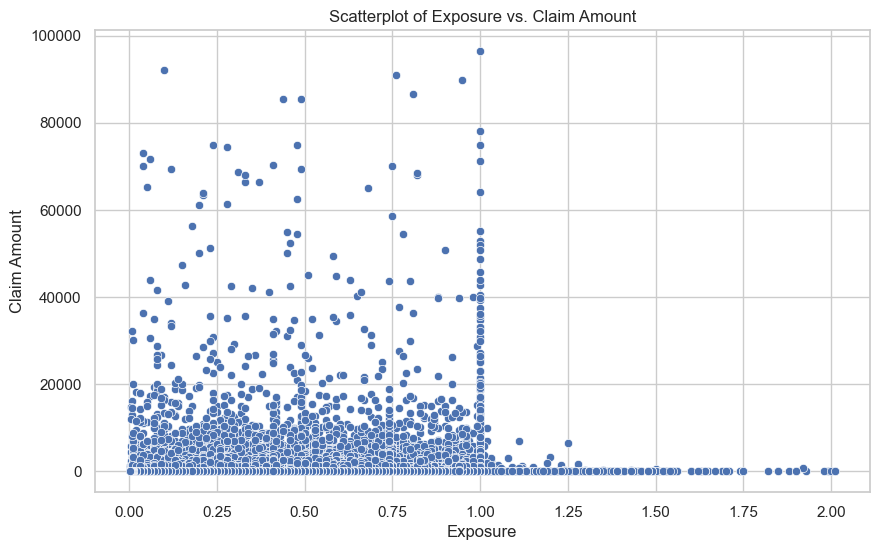

In [690]:
# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exposure', y='TotalClaimAmount', data=joined_df)
plt.title('Scatterplot of Exposure vs. Claim Amount')
plt.xlabel('Exposure')
plt.ylabel('Claim Amount')
plt.show()

# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exposure', y='TotalClaimAmount', data=filtered_df)
plt.title('Scatterplot of Exposure vs. Claim Amount')
plt.xlabel('Exposure')
plt.ylabel('Claim Amount')
plt.show()

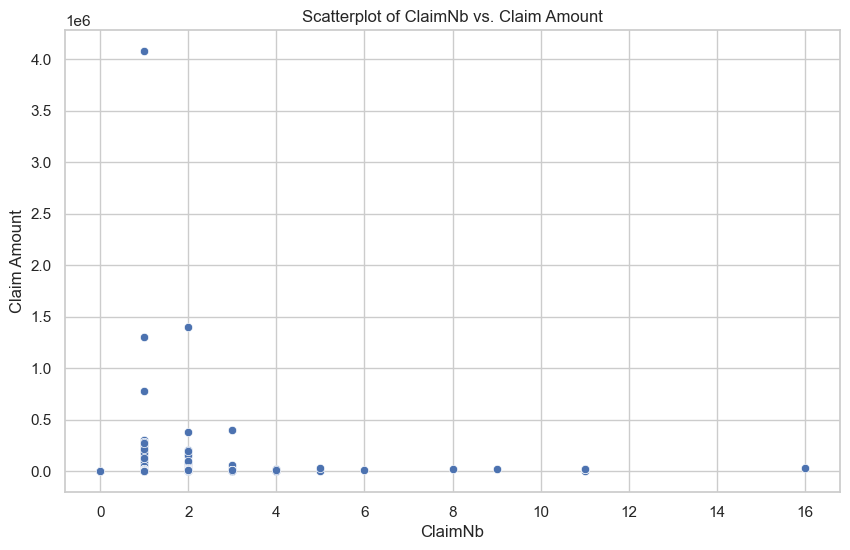

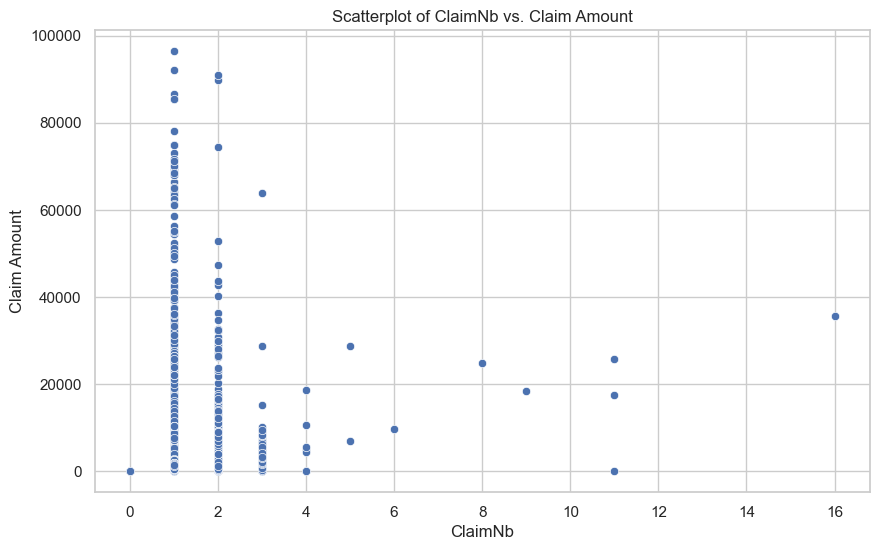

In [691]:
# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ClaimNb', y='TotalClaimAmount', data=joined_df)
plt.title('Scatterplot of ClaimNb vs. Claim Amount')
plt.xlabel('ClaimNb')
plt.ylabel('Claim Amount')
plt.show()

# VehAge vs. ClaimAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ClaimNb', y='TotalClaimAmount', data=filtered_df)
plt.title('Scatterplot of ClaimNb vs. Claim Amount')
plt.xlabel('ClaimNb')
plt.ylabel('Claim Amount')
plt.show()

## 3 - Modellierung

In [586]:
joined_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,TotalClaimAmount,Log_ClaimAmount,ClaimNb_Cat,ClaimNb_Cat_Codes
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01,0.253765,0.053011,0.053011
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03,1.316532,0.236119,0.236119
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,0.000000,0.000000,0.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,15.220480,2.000000,2.000000


In [585]:
filtered_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,TotalClaimAmount,Log_ClaimAmount
count,6.779710e+05,677971.000000,677971.000000,677971.000000,677971.000000,677971.000000,677971.000000,677971.000000,677971.000000,677971.000000
mean,2.621877e+06,0.053175,0.528752,6.454608,7.044142,45.499216,59.760777,1792.416192,66.458436,0.253018
std,1.641791e+06,0.239923,0.364443,2.050886,5.666234,14.136987,15.635855,3958.614865,860.316960,1.313140
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000,0.000000
25%,1.157956e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000,0.000000
50%,2.272155e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000,0.000000
75%,4.046282e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000,0.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,96422.320000,11.476503


# Modelle für Schadenshöhe

## Basismodell Schadenshöhe

In [614]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Definieren des Modells mit der OLS Methode
model_ols = smf.ols('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', data=joined_df).fit()

# Ausdrucken der Zusammenfassung des Modells
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       TotalClaimAmount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.66
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.13e-14
Time:                        19:27:16   Log-Likelihood:            -6.8400e+06
No. Observations:              678013   AIC:                         1.368e+07
Df Residuals:                  678007   BIC:                         1.368e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -227.8304     55.734     -4.088      0.0

## Poisson Modell

In [604]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Modell für Schadenhöhe mit 'Exposure' als Offset für den vollständigen Datensatz
model_1 = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', 
                  data=joined_df, 
                  family=sm.families.Poisson(), 
                  offset=np.log(joined_df['Exposure'])).fit()

print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       TotalClaimAmount   No. Observations:               678013
Model:                            GLM   Df Residuals:                   678007
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9799e+08
Date:                Thu, 30 May 2024   Deviance:                   5.9577e+08
Time:                        18:36:25   Pearson chi2:                 1.85e+11
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6461      0.001   3098.338      0.0

"\n# Modell für Schadenhöhe mit 'Exposure' als Offset für den gefilterten Datensatz\nmodel_2 = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', \n                  data=filtered_df, \n                  family=sm.families.Poisson(), \n                  offset=np.log(filtered_df['Exposure'])).fit()\n\nprint(model_2.summary())\n"

In [626]:
# Angenommene Durchschnittswerte basierend auf deiner Beschreibung
avg_data = {
    'VehAge': [7],  # Durchschnittsalter des Fahrzeugs
    'DrivAge': [45],  # Durchschnittsalter des Fahrers
    'VehPower': [6],  # Durchschnittliche Fahrzeugleistung
    'BonusMalus': [60],  # Durchschnittlicher Bonus-Malus-Wert
    'Density': [1792],  # Durchschnittliche Bevölkerungsdichte
    'Exposure': [0.528750]  # Durchschnittliche Exposure
}

median_data = {
    'VehAge': [6],  # Durchschnittsalter des Fahrzeugs
    'DrivAge': [44],  # Durchschnittsalter des Fahrers
    'VehPower': [6],  # Durchschnittliche Fahrzeugleistung
    'BonusMalus': [50],  # Durchschnittlicher Bonus-Malus-Wert
    'Density': [393],  # Durchschnittliche Bevölkerungsdichte
    'Exposure': [0.490000]  # Durchschnittliche Exposure
}

# Erstellen eines DataFrame mit den Durchschnittswerten
avg_df = pd.DataFrame(avg_data)

# Vorhersage für die durchschnittliche Police
avg_df['predicted_claim'] = model_1.predict(avg_df)

# Ausgabe der Vorhersage
print(avg_df['predicted_claim'])

# Erstellen Data Frame mit Medianwerten
median_df = pd.DataFrame(median_data)

# Vorhersage für die median Police
median_df['predicted_claim'] = model_1.predict(median_df)

# Ausgabe der Vorhersage
print(median_df['predicted_claim'])

0    145.126515
Name: predicted_claim, dtype: float64
0    104.451618
Name: predicted_claim, dtype: float64


In [625]:
joined_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,TotalClaimAmount,Log_ClaimAmount,ClaimNb_Cat,ClaimNb_Cat_Codes
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01,0.253765,0.053011,0.053011
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03,1.316532,0.236119,0.236119
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,0.000000,0.000000,0.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,15.220480,2.000000,2.000000


## Negative Binominal Modell für Schadenshöhe mit statischem Alpha 

In [613]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Modell für Schadenhöhe mit 'Exposure' als Offset für den vollständigen Datensatz, 
# Negative Binomial als Modell zur Handhabung von Überdispersion

model_1_nb = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', 
                     data=joined_df, 
                     family=sm.families.NegativeBinomial(alpha=1.0), # Inital mit Alpha gleich 1 beginnen
                     offset=np.log(joined_df['Exposure'])).fit()

print(model_1_nb.summary())



model_2_nb = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', 
                     data=joined_df, 
                     family=sm.families.NegativeBinomial(alpha=50.0), # Inital mit Alpha gleich 1 beginnen
                     offset=np.log(joined_df['Exposure'])).fit()

print(model_2_nb.summary())


# Schätzung eines Alpha Wertes: (Alpha = (Chi2/DF) - 1)
print((1.85e+11 / 678007) - 1)


model_3_nb = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', 
                     data=joined_df, 
                     family=sm.families.NegativeBinomial(alpha=272.1), # Inital mit Alpha gleich 1 beginnen
                     offset=np.log(joined_df['Exposure'])).fit()

print(model_3_nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       TotalClaimAmount   No. Observations:               678013
Model:                            GLM   Df Residuals:                   678007
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.8097e+06
Date:                Thu, 30 May 2024   Deviance:                   7.2254e+06
Time:                        19:06:40   Pearson chi2:                 2.41e+09
No. Iterations:                    24   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4197      0.010    353.309      0.0

"\n# Modell für Schadenhöhe mit 'Exposure' als Offset für den gefilterten Datensatz,\n# Negative Binomial als Modell zur Handhabung von Überdispersion\nmodel_2_nb = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', \n                     data=filtered_df, \n                     family=sm.families.NegativeBinomial(), \n                     offset=np.log(filtered_df['Exposure'])).fit()\n\nprint(model_2_nb.summary())\n"

## Negative Binominal Modell für Schadenshöhe mit statischem Alpha = 50 (Finales Modell)

In [630]:
final_model = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', 
                     data=joined_df, 
                     family=sm.families.NegativeBinomial(alpha=50.0), 
                     offset=np.log(joined_df['Exposure'])).fit()

print(final_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       TotalClaimAmount   No. Observations:               678013
Model:                            GLM   Df Residuals:                   678007
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.9545e+05
Date:                Thu, 30 May 2024   Deviance:                   2.4741e+05
Time:                        23:13:19   Pearson chi2:                 4.99e+07
No. Iterations:                    24   Pseudo R-squ. (CS):           0.008969
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7293      0.068     55.080      0.0

In [628]:
# Erstellen eines DataFrame mit den Durchschnittswerten
avg_df = pd.DataFrame(avg_data)

# Vorhersage für die durchschnittliche Police
avg_df['predicted_claim'] = model_2_nb.predict(avg_df)

# Ausgabe der Vorhersage
print(avg_df['predicted_claim'])

# Erstellen Data Frame mit Medianwerten
median_df = pd.DataFrame(median_data)

# Vorhersage für die median Police
median_df['predicted_claim'] = model_2_nb.predict(median_df)

# Ausgabe der Vorhersage
print(median_df['predicted_claim'])

0    296.638756
Name: predicted_claim, dtype: float64
0    210.408709
Name: predicted_claim, dtype: float64


In [621]:
joined_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,TotalClaimAmount,Log_ClaimAmount,ClaimNb_Cat,ClaimNb_Cat_Codes
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01,0.253765,0.053011,0.053011
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03,1.316532,0.236119,0.236119
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,0.000000,0.000000,0.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,15.220480,2.000000,2.000000


In [615]:
model_2_nb_quad = smf.glm('TotalClaimAmount ~ VehAge + VehAge^2 + DrivAge + DrivAge^2 + VehPower + BonusMalus + Density', 
                     data=joined_df, 
                     family=sm.families.NegativeBinomial(alpha=50.0), # Inital mit Alpha gleich 1 beginnen
                     offset=np.log(joined_df['Exposure'])).fit()

print(model_2_nb_quad.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       TotalClaimAmount   No. Observations:               678013
Model:                            GLM   Df Residuals:                   678005
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.9541e+05
Date:                Thu, 30 May 2024   Deviance:                   2.4734e+05
Time:                        19:31:59   Pearson chi2:                 4.90e+07
No. Iterations:                    23   Pseudo R-squ. (CS):           0.009076
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.6962      0.068     54.572      

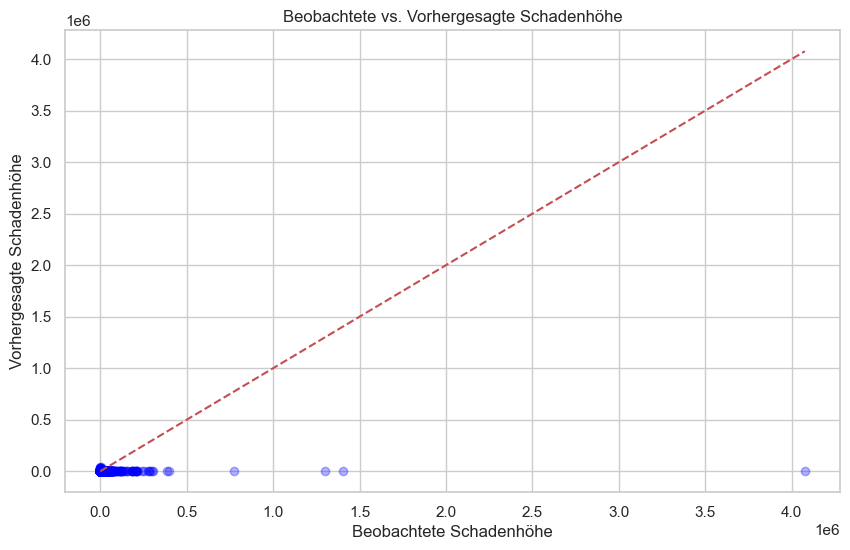

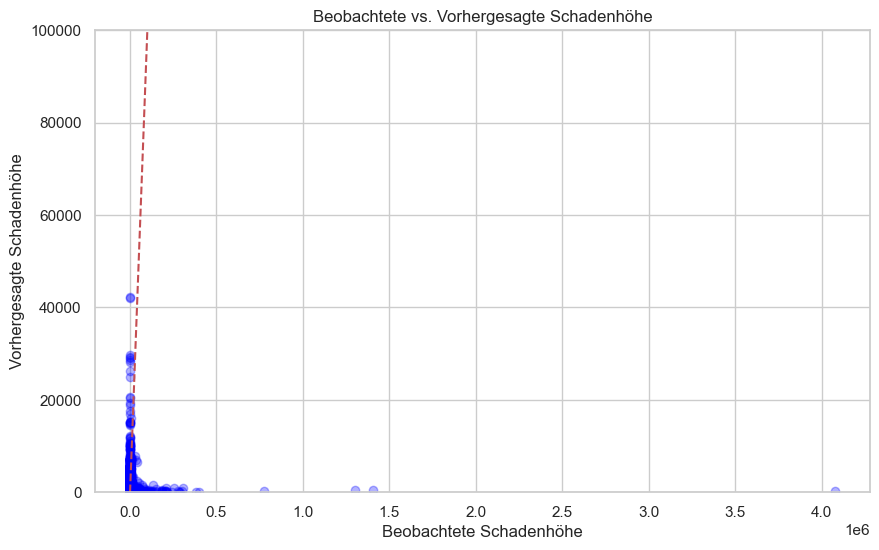

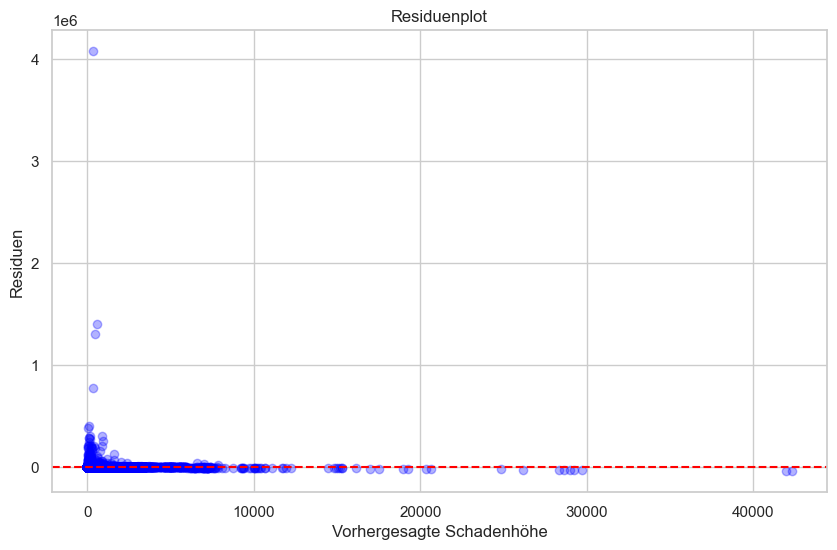

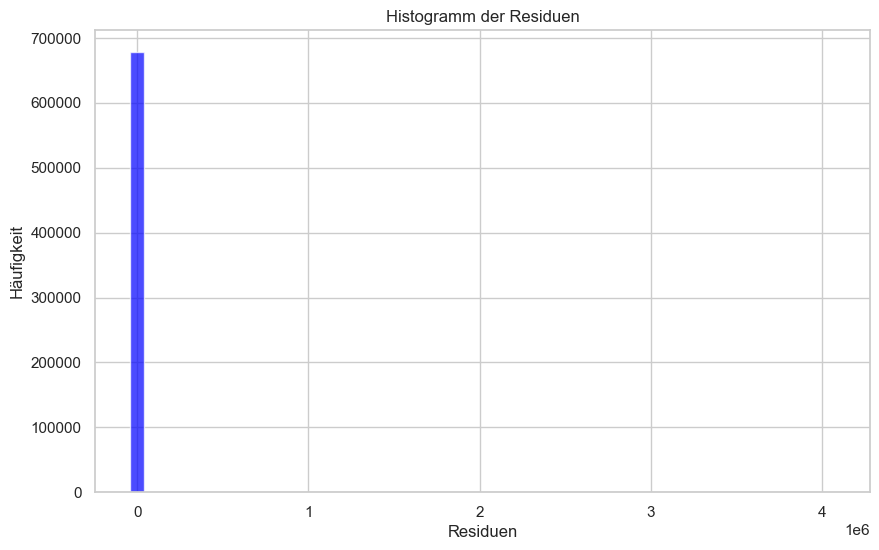

In [632]:
import matplotlib.pyplot as plt

# Berechnen der vorhergesagten Werte aus dem Modell
predicted_values = final_model.predict()

# Scatterplot der beobachteten gegen die vorhergesagten Werte
plt.figure(figsize=(10, 6))
plt.scatter(joined_df['TotalClaimAmount'], predicted_values, alpha=0.3, color='blue')
plt.plot([joined_df['TotalClaimAmount'].min(), joined_df['TotalClaimAmount'].max()], 
         [joined_df['TotalClaimAmount'].min(), joined_df['TotalClaimAmount'].max()], 'r--')
plt.xlabel('Beobachtete Schadenhöhe')
plt.ylabel('Vorhergesagte Schadenhöhe')
plt.title('Beobachtete vs. Vorhergesagte Schadenhöhe')
plt.grid(True)
plt.show()

# Scatterplot der beobachteten gegen die vorhergesagten Werte mit beschränkter Y-Achse
plt.figure(figsize=(10, 6))
plt.scatter(joined_df['TotalClaimAmount'], predicted_values, alpha=0.3, color='blue')
plt.plot([joined_df['TotalClaimAmount'].min(), joined_df['TotalClaimAmount'].max()], 
         [joined_df['TotalClaimAmount'].min(), joined_df['TotalClaimAmount'].max()], 'r--')
plt.xlabel('Beobachtete Schadenhöhe')
plt.ylabel('Vorhergesagte Schadenhöhe')
plt.title('Beobachtete vs. Vorhergesagte Schadenhöhe')
plt.ylim(0, 0.1 * 10**6)  # Beschränkung der Y-Achse auf 0.5 * 10^6
plt.grid(True)
plt.show()

# Berechnen der Residuen
residuals = joined_df['TotalClaimAmount'] - predicted_values

# Residuenplot
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.3, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Vorhergesagte Schadenhöhe')
plt.ylabel('Residuen')
plt.title('Residuenplot')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Residuen')
plt.grid(True)
plt.show()


## Model für Schadenhöhe 

In [633]:
# Erstelle das erste Modell mit einem anfänglichen Alpha-Wert für den vollständigen Datensatz
initial_model_full = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', 
                             data=joined_df, 
                             family=sm.families.NegativeBinomial(alpha=0.5),
                             offset=np.log(joined_df['Exposure']))
initial_result_full = initial_model_full.fit()
print("Initial alpha used (Full Data):", initial_model_full.family.alpha)
print(initial_result_full.summary())

# Schätze Alpha basierend auf der Skala des anfänglichen Modells
refined_alpha_full = initial_result_full.pearson_chi2 / initial_result_full.df_resid

# Wiederhole die Modellierung mit dem neuen geschätzten Alpha
refined_model_full = smf.glm('TotalClaimAmount ~ VehAge + DrivAge + VehPower + BonusMalus + Density', 
                             data=joined_df, 
                             family=sm.families.NegativeBinomial(alpha=refined_alpha_full),
                             offset=np.log(joined_df['Exposure']))
refined_result_full = refined_model_full.fit()
print("\nRefined alpha used (Full Data):", refined_model_full.family.alpha)
print(refined_result_full.summary())

Initial alpha used (Full Data): 0.5
                 Generalized Linear Model Regression Results                  
Dep. Variable:       TotalClaimAmount   No. Observations:               678013
Model:                            GLM   Df Residuals:                   678007
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4847e+06
Date:                Thu, 30 May 2024   Deviance:                   1.2595e+07
Time:                        23:16:22   Pearson chi2:                 4.67e+09
No. Iterations:                    26   Pseudo R-squ. (CS):             0.5992
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3

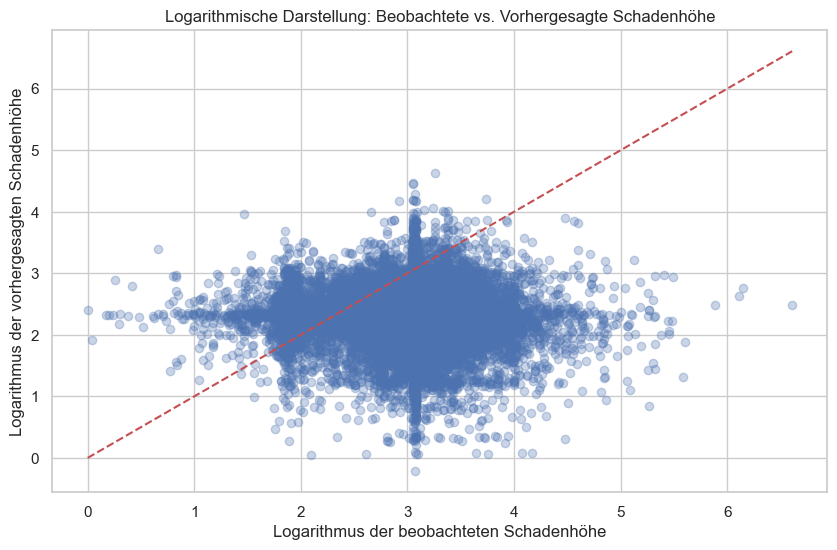

In [634]:
import matplotlib.pyplot as plt
import numpy as np

# Sicherstellen, dass keine Nullwerte für den Logarithmus vorhanden sind
actual = joined_df['TotalClaimAmount'].replace(0, np.nan)
predicted = final_model.fittedvalues.replace(0, np.nan)

plt.figure(figsize=(10, 6))
plt.scatter(np.log10(actual), np.log10(predicted), alpha=0.3)
plt.xlabel('Logarithmus der beobachteten Schadenhöhe')
plt.ylabel('Logarithmus der vorhergesagten Schadenhöhe')
plt.title('Logarithmische Darstellung: Beobachtete vs. Vorhergesagte Schadenhöhe')
plt.plot([np.log10(actual.min()), np.log10(actual.max())], [np.log10(actual.min()), np.log10(actual.max())], 'r--')
plt.grid(True)
plt.show()


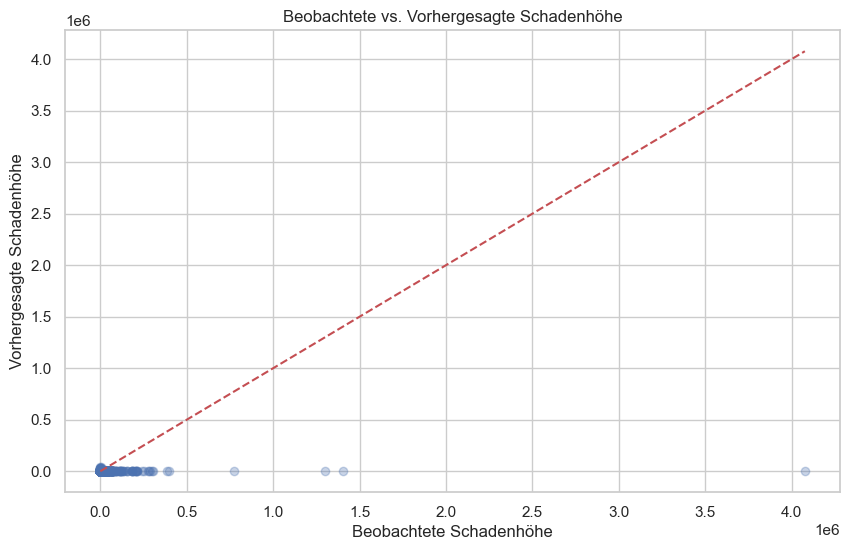

In [592]:
import matplotlib.pyplot as plt

# Annahme, dass `predicted` die vorhergesagten Werte aus deinem Modell und `actual` die tatsächlichen Werte aus deinen Daten sind
plt.figure(figsize=(10, 6))
plt.scatter(joined_df['TotalClaimAmount'], model_1_nb.fittedvalues, alpha=0.3)
plt.xlabel('Beobachtete Schadenhöhe')
plt.ylabel('Vorhergesagte Schadenhöhe')
plt.title('Beobachtete vs. Vorhergesagte Schadenhöhe')
plt.plot([joined_df['TotalClaimAmount'].min(), joined_df['TotalClaimAmount'].max()], [joined_df['TotalClaimAmount'].min(), joined_df['TotalClaimAmount'].max()], 'r--')
plt.grid(True)
plt.show()

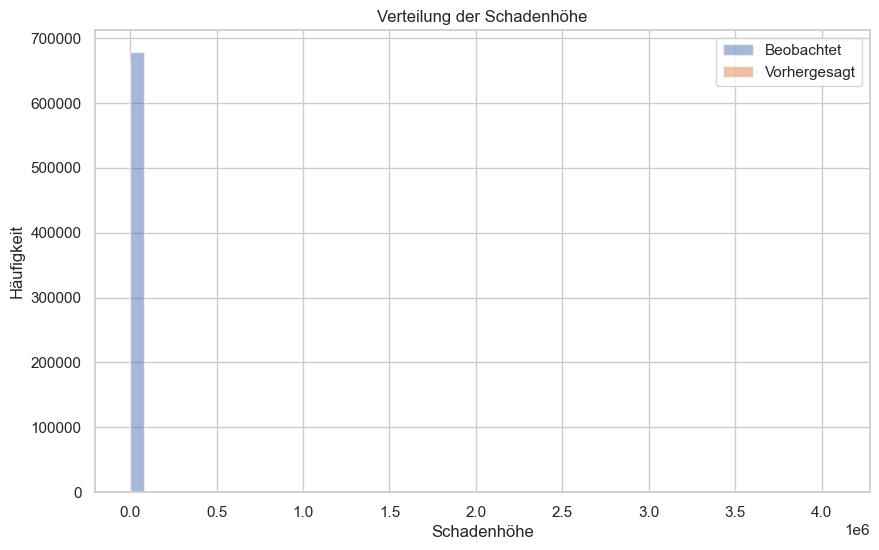

# Älterer Ansatz 

# Basismodell Schadensfrequenz

In [566]:
joined_df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,TotalClaimAmount,Log_ClaimAmount
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01,0.253765
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03,1.316532
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,0.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,15.220480


In [567]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IDpol             678013 non-null  float64
 1   ClaimNb           678013 non-null  int64  
 2   Exposure          678013 non-null  float64
 3   Area              678013 non-null  object 
 4   VehPower          678013 non-null  int64  
 5   VehAge            678013 non-null  int64  
 6   DrivAge           678013 non-null  int64  
 7   BonusMalus        678013 non-null  int64  
 8   VehBrand          678013 non-null  object 
 9   VehGas            678013 non-null  object 
 10  Density           678013 non-null  int64  
 11  Region            678013 non-null  object 
 12  TotalClaimAmount  678013 non-null  float64
 13  Log_ClaimAmount   678013 non-null  float64
 14  ClaimNb_Cat       678013 non-null  object 
dtypes: float64(4), int64(6), object(5)
memory usage: 77.6+ MB


# Poisson GLM mit numerischem Output

In [581]:
## Ganz normales Modell mit Numerischem Outcome

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Definiere das Modell
formula = 'ClaimNb ~ VehPower + VehAge + DrivAge + BonusMalus + Density + C(Area) + C(VehBrand) + C(VehGas) + C(Region)'
offset = joined_df['Exposure'].apply(np.log)  # Der log der Exposure wird als Offset verwendet

# Erstelle das Modell mit einem Offset für die Exposure
model = smf.glm(formula=formula, data=joined_df, family=sm.families.Poisson(), offset=offset)
result = model.fit()

# Zeige die Ergebnisse
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   677970
Model Family:                 Poisson   Df Model:                           42
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4331e+05
Date:                Thu, 30 May 2024   Deviance:                   2.1729e+05
Time:                        15:58:01   Pearson chi2:                 1.79e+06
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01054
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3

## Logistische Regression mit kategorischem Output

In [584]:
# Konvertiere 'ClaimNb_Cat' zu kategorischen Codes
joined_df['ClaimNb_Cat_Codes'] = pd.Categorical(joined_df['ClaimNb_Cat']).codes

# Erstelle eine neue Formel, die die numerischen Kategorien verwendet
formula_cat = 'ClaimNb_Cat_Codes ~ VehPower + VehAge + DrivAge + BonusMalus + Density + C(Area) + C(VehBrand) + C(VehGas) + C(Region)'

# Berechne den log der Exposure, um ihn als Offset zu verwenden
offset = np.log(joined_df['Exposure'])

# Erstelle das Modell, diesmal ohne den Offset-Parameter, da MNLogit dies nicht direkt unterstützt
model_cat = smf.mnlogit(formula=formula_cat, data=joined_df)
result_cat = model_cat.fit()

# Zeige die Ergebnisse
print(result_cat.summary())

Optimization terminated successfully.
         Current function value: 0.206740
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:      ClaimNb_Cat_Codes   No. Observations:               678013
Model:                        MNLogit   Df Residuals:                   677927
Method:                           MLE   Df Model:                           84
Date:                Thu, 30 May 2024   Pseudo R-squ.:                 0.01525
Time:                        16:20:06   Log-Likelihood:            -1.4017e+05
converged:                       True   LL-Null:                   -1.4234e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
   ClaimNb_Cat_Codes=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.6612      0.052    -89.348      0.000      -4.763     

In [502]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import statsmodels.formula.api as smf

# Konvertiere die kategoriale Variable, falls noch nicht geschehen
joined_df['ClaimNb_Cat'] = joined_df['ClaimNb_Cat'].astype('category').cat.codes

# Definiere die Anzahl der Folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Leeres Array für die Speicherung von Scores und eine Liste für Konfusionsmatrizen
scores = []
all_conf_matrices = []

# Teile die Daten in Trainings- und Testsets
for train_index, test_index in kf.split(joined_df):
    train_df = joined_df.iloc[train_index]
    test_df = joined_df.iloc[test_index]
    
    # Erstelle und passe das Modell an
    model = smf.mnlogit('ClaimNb_Cat ~ VehPower + VehAge + DrivAge + BonusMalus + Density + C(Area) + C(VehBrand) + C(VehGas) + C(Region)', data=train_df)
    result = model.fit(disp=0)  # disp=0 verhindert, dass die Fit-Informationen gedruckt werden
    
    # Bewerte das Modell am Testset
    predictions = result.predict(test_df).idxmax(axis=1)
    score = (predictions == test_df['ClaimNb_Cat']).mean()  # Genauigkeit berechnen
    scores.append(score)
    
    # Berechne die Konfusionsmatrix für diesen Fold und speichere sie
    unique_labels = np.sort(test_df['ClaimNb_Cat'].unique())
    conf_matrix = confusion_matrix(test_df['ClaimNb_Cat'], predictions, labels=unique_labels)
    all_conf_matrices.append(conf_matrix)

# Durchschnittliche Genauigkeit und Konfusionsmatrizen ausgeben
average_score = np.mean(scores)
print(f'Durchschnittliche Genauigkeit: {average_score}')
print("Konfusionsmatrizen für jeden Fold:")
for i, matrix in enumerate(all_conf_matrices, 1):
    print(f"Fold {i} Konfusionsmatrix:")
    print(matrix)


Durchschnittliche Genauigkeit: 0.9497649729406372
Konfusionsmatrizen für jeden Fold:
Fold 1 Konfusionsmatrix:
[[128757      0      0]
 [  6472      1      0]
 [   373      0      0]]
Fold 2 Konfusionsmatrix:
[[128934      0      0]
 [  6314      0      0]
 [   355      0      0]]
Fold 3 Konfusionsmatrix:
[[128871      1      0]
 [  6354      0      0]
 [   377      0      0]]
Fold 4 Konfusionsmatrix:
[[128637      0      0]
 [  6577      0      0]
 [   388      0      0]]
Fold 5 Konfusionsmatrix:
[[128753      0      0]
 [  6460      0      0]
 [   389      0      0]]


# Negativ Binomial Model um Overdispersion zu berücksichtigen. Numerischer Outcome

In [480]:
## Negative Binomial Modell um überdispersion zu Berücksichtigen

# Definiere das Modell
formula = 'ClaimNb ~ VehPower + VehAge + DrivAge + BonusMalus + Density + C(Area) + C(VehBrand) + C(VehGas) + C(Region)'
offset = np.log(joined_df['Exposure'])  # Der log der Exposure wird als Offset verwendet

# Erstelle ein negatives Binomialmodell mit einem Offset für die Exposure
model = smf.glm(formula=formula, data=joined_df, family=sm.families.NegativeBinomial(), offset=offset)
result = model.fit()

# Zeige die Ergebnisse
print(result.summary())

C:\Users\soere\AppData\Roaming\Python\Python311\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   677970
Model Family:        NegativeBinomial   Df Model:                           42
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4289e+05
Date:                Thu, 30 May 2024   Deviance:                   1.8929e+05
Time:                        12:44:42   Pearson chi2:                 1.73e+06
No. Iterations:                     8   Pseudo R-squ. (CS):           0.009931
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3

# Kategorischer Outcome, logit modell

In [570]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Konvertiere 'ClaimNb_Cat' zu einer numerischen kategorialen Variable, wenn nötig
joined_df['ClaimNb_Cat'] = joined_df['ClaimNb_Cat'].astype('category').cat.codes

# Angenommen, ClaimNb_Cat ist bereits als kategoriale Variable in deinem DataFrame vorhanden
formula = 'ClaimNb_Cat ~ VehPower + VehAge + DrivAge + BonusMalus + Density + C(Area) + C(VehBrand) + C(VehGas) + C(Region)'

# Erstelle das multinomiale Modell
model = smf.mnlogit(formula, data=joined_df)
result = model.fit()

# Zeige die Ergebnisse
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.206740
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:            ClaimNb_Cat   No. Observations:               678013
Model:                        MNLogit   Df Residuals:                   677927
Method:                           MLE   Df Model:                           84
Date:                Thu, 30 May 2024   Pseudo R-squ.:                 0.01525
Time:                        15:10:12   Log-Likelihood:            -1.4017e+05
converged:                       True   LL-Null:                   -1.4234e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
         ClaimNb_Cat=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.6612      0.052    -89.348      0.000      -4.763     

# Versuche mit Gewichtungen eine gute Vorhersage der Einzelklassen zu erreichen

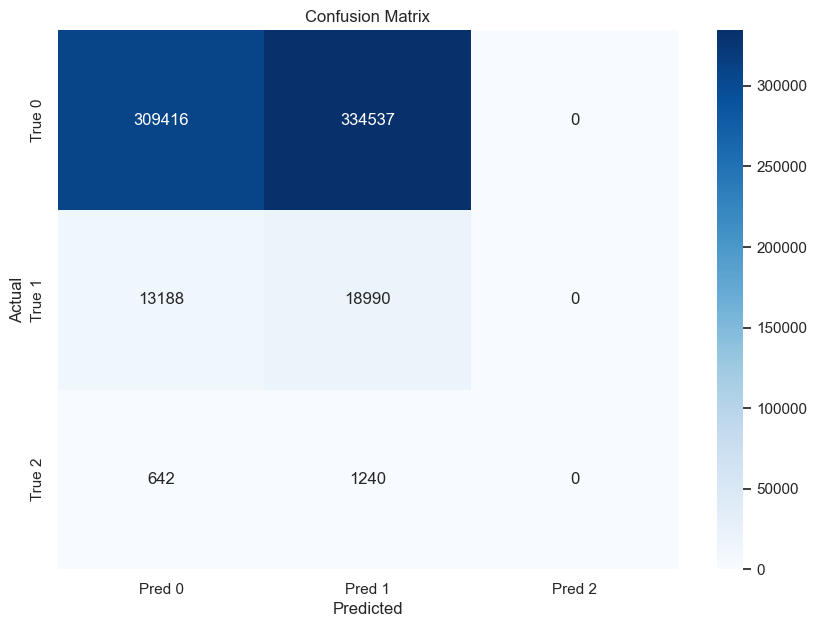

C:\Users\soere\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      0.48      0.64    643953
           1       0.05      0.59      0.10     32178
           2       0.00      0.00      0.00      1882

    accuracy                           0.48    678013
   macro avg       0.34      0.36      0.25    678013
weighted avg       0.91      0.48      0.61    678013



C:\Users\soere\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soere\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [580]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardisierung der Daten
scaler = StandardScaler()
features = ['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']
X = joined_df[features]
X_scaled = scaler.fit_transform(X)

# Dummy-Variablen für kategoriale Merkmale erstellen
X = pd.get_dummies(joined_df[features + ['Area', 'VehBrand', 'VehGas', 'Region']], drop_first=True)
y = joined_df['ClaimNb_Cat']

# Gewichtung basierend auf den Klassen definieren
class_weights = {
    0: 1,   # Normales Gewicht für die häufigste Klasse
    1: 20,  # Erhöhtes Gewicht für die erste Minderheitsklasse
    2: 40   # Erhöhtes Gewicht für die zweite Minderheitsklasse
}

# Logistic Regression Modell mit class_weight Option
model = LogisticRegression(class_weight=class_weights, max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Vorhersagen berechnen
predicted_classes = model.predict(X)

# Konfusionsmatrix erstellen
cm = confusion_matrix(y, predicted_classes)

# Konvertiere die Konfusionsmatrix in ein DataFrame für bessere Lesbarkeit
cm_df = pd.DataFrame(cm, index=[f'True {i}' for i in model.classes_], columns=[f'Pred {i}' for i in model.classes_])

# Plot der Konfusionsmatrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Ausgabe des Klassifikationsberichts
print(classification_report(y, predicted_classes))
